#### Kaggle competition DSCC 483
#### Mini Project - Fall 2022
#### Tapan Pradyot
#### Hailey Thanki

# Import required libraries

In [1]:
!pip install tabulate
!pip install wordcloud
!pip install gensim
!pip install --user --upgrade scikit-learn == 1.1.2

%pylab inline

import pickle as pk
from scipy import sparse as sp
import warnings
from wordcloud import WordCloud
import itertools
import collections
from tabulate import tabulate
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from gensim.models import Phrases
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
import sklearn
from gensim.corpora import Dictionary
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer


pyLDAvis.enable_notebook()

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", DeprecationWarning)

print('The scikit-learn version is {}.'.format(sklearn.__version__))

zsh:1: = not found
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
The scikit-learn version is 1.1.2.


# Import data

In [2]:
df_raw = pd.read_csv("training_data.csv", low_memory = False)
df_raw

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us
...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand


# Descriptive Analysis on Raw Data

## Analyzing character and word counts for tweets

In [3]:
# Calculating character and word count for each tweet

df_raw['text_char_count'] = df_raw['text'].astype(str).apply(len)
df_raw['text_word_count'] = df_raw['text'].apply(lambda x: len(str(x).split()))
df_raw


,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,267,41
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us,281,48
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us,292,50
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,236,31
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,279,35
...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,39,7
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,307,43
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,115,18


In [4]:
# Calculating the mean, median, maximum and minimum of word count and character count of tweets

table = [['Attribute', 'Aggregation Type', 'Value'], 
         ['Character Count', 'mean', round((df_raw.text_char_count.mean()),2)], 
         ['', 'median', round((df_raw.text_char_count.median()),2)],
         ['', 'max', round((df_raw.text_char_count.max()),2)], 
         ['', 'min', round((df_raw.text_char_count.min()),2)],
         ['Word Count', 'mean', round((df_raw.text_word_count.mean()),2)], 
         ['', 'median', round((df_raw.text_word_count.median()),2)],
         ['', 'max', round((df_raw.text_word_count.max()),2)], 
         ['', 'min', round((df_raw.text_word_count.min()),2)]]
print(tabulate(table, headers='firstrow'))

Attribute        Aggregation Type      Value
---------------  ------------------  -------
Character Count  mean                 204.98
                 median               221
                 max                  425
                 min                    1
Word Count       mean                  28.83
                 median                30
                 max                   82
                 min                    1


In [5]:
# Calculating character and word count for each tweet's hashtags

df_raw['hashtags_char_count'] = df_raw['hashtags'].astype(str).apply(len)
df_raw['hashtags_word_count'] = df_raw['hashtags'].apply(lambda x: len(str(x).split()))
df_raw


,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,267,41,28,2
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us,281,48,5,1
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us,292,50,7,1
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,236,31,35,4
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,279,35,30,3
...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,39,7,6,1
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,115,18,7,1


In [6]:
# Calculating the mean, median, maximum and minimum of word count and character count of hashtags

table = [['Attribute', 'Aggregation Type', 'Value'], 
         ['Character Count', 'mean', round((df_raw.hashtags_char_count.mean()),2)], 
         ['', 'median', round((df_raw.hashtags_char_count.median()),2)],
         ['', 'max', round((df_raw.hashtags_char_count.max()),2)], 
         ['', 'min', round((df_raw.hashtags_char_count.min()),2)],
         ['Word Count', 'mean', round((df_raw.hashtags_word_count.mean()),2)], 
         ['', 'median', round((df_raw.hashtags_word_count.median()),2)],
         ['', 'max', round((df_raw.hashtags_word_count.max()),2)], 
         ['', 'min', round((df_raw.hashtags_word_count.min()),2)]]
print(tabulate(table, headers='firstrow'))

Attribute        Aggregation Type      Value
---------------  ------------------  -------
Character Count  mean                  16.5
                 median                11
                 max                  124
                 min                    1
Word Count       mean                   1.81
                 median                 1
                 max                   20
                 min                    1


## Analyzing frequency of words in tweets

In [7]:
# Splitting each tweet into individual words

words_in_tweet = [tweet.lower().split() for tweet in df_raw.hashtags]

# List of all words across tweets

all_words = list(itertools.chain(*words_in_tweet))

# Create a word frequency counter

word_freq = collections.Counter(all_words)
top_10_words_freq = word_freq.most_common(10)
top_10_words_freq

[('covid19', 115377),
 ('coronavirus', 33708),
 ('covid', 14892),
 ('covid_19', 7617),
 ('covidー19', 5628),
 ('staysafe', 4699),
 ('stayhome', 3670),
 ('pandemic', 3487),
 ('covidiots', 2584),
 ('lockdown', 2294)]

In [8]:
top_10_words = []

for i in range(0,10):
    word = top_10_words_freq[i][0]
    top_10_words.append(word)
    
top_10_words

['covid19',
 'coronavirus',
 'covid',
 'covid_19',
 'covidー19',
 'staysafe',
 'stayhome',
 'pandemic',
 'covidiots',
 'lockdown']

In [9]:
countries = df_raw.country.unique()
countries

array(['us', 'uk', 'canada', 'australia', 'ireland', 'new_zealand'],
      dtype=object)

In [10]:
df_top_10_words_by_country = pd.DataFrame(columns=['country', 'word','freq'])

for country in countries:
    df_raw_country = df_raw[df_raw.country == country]
    words_in_tweet = [tweet.lower().split() for tweet in df_raw_country.hashtags]
    all_words = list(itertools.chain(*words_in_tweet))
    for word in top_10_words:
        freq = all_words.count(word)
        df_top_10_words_curr_country = pd.DataFrame([[country, word, freq]], columns = ['country', 'word','freq'])
        df_top_10_words_by_country = pd.concat([df_top_10_words_by_country, df_top_10_words_curr_country])
    
df_top_10_words_by_country.reset_index().drop(columns='index')

,country,word,freq
0,us,covid19,19293
1,us,coronavirus,6622
2,us,covid,2719
3,us,covid_19,983
4,us,covidー19,897
5,us,staysafe,329
6,us,stayhome,583
7,us,pandemic,683
8,us,covidiots,461
9,us,lockdown,140


In [11]:
df_top_10_words_by_country = df_top_10_words_by_country.groupby(['country', 'word'])['freq'].sum().unstack().fillna(0)
df_top_10_words_by_country

word,coronavirus,covid,covid19,covid_19,covidiots,covidー19,lockdown,pandemic,stayhome,staysafe
country,,,,,,,,,,
australia,5249,2735,18833,1278,532,825,241,618,680,528
canada,5517,2269,19512,1229,448,904,453,627,537,686
ireland,4642,2000,20004,1528,357,962,548,334,566,1650
new_zealand,4756,2762,20495,1315,385,1083,320,635,629,529
uk,6922,2407,17240,1284,401,957,592,590,675,977
us,6622,2719,19293,983,461,897,140,683,583,329


/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_61326/164951854.py:9: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  plt.tight_layout()
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


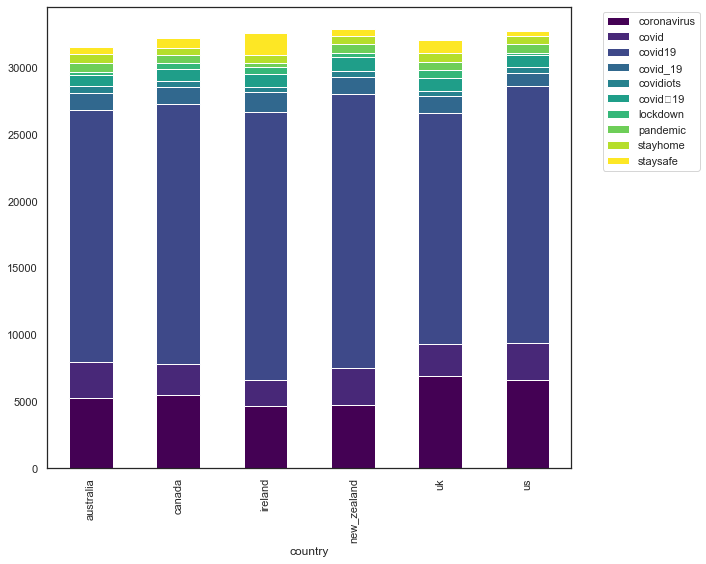

In [12]:
plt.rcParams["figure.figsize"] = (10,8)

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
df_top_10_words_by_country.plot(kind='bar', stacked=True, cmap="viridis")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.show()

## Latent Dirichlet Allocation (LDA)

In [13]:
df_raw_lda = df_raw.copy(deep = True)

# Remove punctuation
df_raw_lda['text_processed'] = df_raw['text'].map(lambda x:re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_raw_lda['text_processed'] = df_raw_lda['text_processed'].map(lambda x: x.lower())

# Print out the first rows of processed tweets
df_raw_lda['text_processed'].head()

0    remember the #wuhancoronavirus the pandemic wh...
1    my sources @whitehouse say 2 tactics will be u...
2    i'll venture a wild guess: if you were running...
3    #pakistan (#greenstimulus = #nature protection...
4    🇺🇸 pandémie de #coronavirus: 30 pasteurs améri...
Name: text_processed, dtype: object

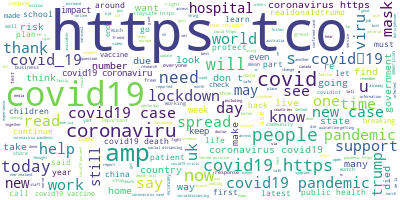

In [14]:
plt.rcParams["figure.figsize"] = (10,8)

# Join the different processed tweets together
long_string = ','.join(list(df_raw_lda['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

/Users/haileythanki/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


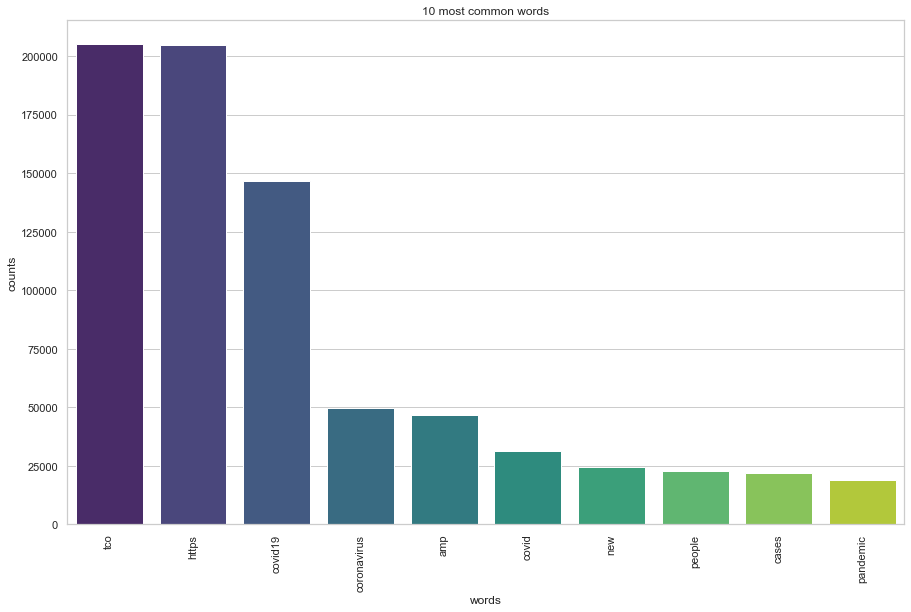

In [15]:
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc=
    {"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='viridis')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_raw_lda['text_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [16]:
p_df = pd.read_csv("training_data.csv", low_memory = False)
docs = array(p_df['text'])

In [17]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

docs = docs_preprocessor(docs)

In [18]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more)

bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [19]:
# Create a dictionary representation of the tweets

dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 1000 tweets, or more than 50% of the tweets

dictionary.filter_extremes(no_below=1000, no_above=0.5)
print('Number of unique words after removing rare and common words:', len(dictionary))


Number of unique words in initital documents: 415014
Number of unique words after removing rare and common words: 608


In [20]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of tweets: %d' % len(corpus))

Number of unique tokens: 608
Number of tweets: 240000


In [21]:
# Set training parameters

num_topics = 10
chunksize = 500 # size of the tweet looked at every pass
passes = 20 # number of passes through tweets
iterations = 400
eval_every = 1  

# Make an index to word dictionary

temp = dictionary[0] 
id2word = dictionary.id2token

%time model = LdaModel(corpus = corpus, id2word = id2word, chunksize = chunksize, alpha = 'auto', \
                       eta = 'auto', iterations = iterations, num_topics = num_topics, passes  =passes, \
                       eval_every = eval_every)

CPU times: user 11min 1s, sys: 1.85 s, total: 11min 3s
Wall time: 11min 5s


In [22]:
# feed the LDA model into the pyLDAvis instance

lda_viz = gensimvis.prepare(model, corpus, dictionary)

/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/hailey

In [23]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.303947 -0.003452       1        1  42.006482
0     -0.136119  0.380719       2        1   9.216374
9      0.106512 -0.150046       3        1   9.052037
5      0.104500  0.090673       4        1   8.649211
8      0.102541 -0.028329       5        1   7.022611
6      0.101188 -0.026496       6        1   6.284178
3     -0.257026 -0.249472       7        1   5.591378
1      0.096755 -0.005621       8        1   4.771337
7      0.091738 -0.017900       9        1   3.725690
2      0.093858  0.009925      10        1   3.680703, topic_info=          Term          Freq         Total Category  logprob  loglift
83    covid_19  36945.000000  36945.000000  Default  30.0000  30.0000
95        have  33616.000000  33616.000000  Default  29.0000  29.0000
131       case  29272.000000  29272.000000  Default  28.0000  28.0000
18        more  24363.000000  24363.000000  Default  27.0000  27.0000
122       your  17592.000000  17592.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
607     hamont      0.093525   8419.667272  Topic10 -13.6900  -8.1058
358   antibody      0.091243   1343.721884  Topic10 -13.7147  -6.2954
222      trial      0.091242   1714.656737  Topic10 -13.7147  -6.5391
605     auspol      0.091237    810.133127  Topic10 -13.7147  -5.7894
602  covid19uk      0.091237    789.735089  Topic10 -13.7147  -5.7639

[339 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
101       1  0.999979      about
564       5  0.999354     access
512       8  0.999721     action
590       9  0.999701     active
67        1  0.999860      after
...     ...       ...        ...
90        6  0.999833       year
91        2  0.999510  yesterday
122       7  0.999969       your
424       7  0.999540   yourself
544       4  0.999864    zealand

[310 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 10, 6, 9, 7, 4, 2, 8, 3])

## Non-negative Matrix Factorization

Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 0.054s.
Extracting tf features for LDA...
done in 0.047s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


/Users/haileythanki/.local/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


done in 0.126s.


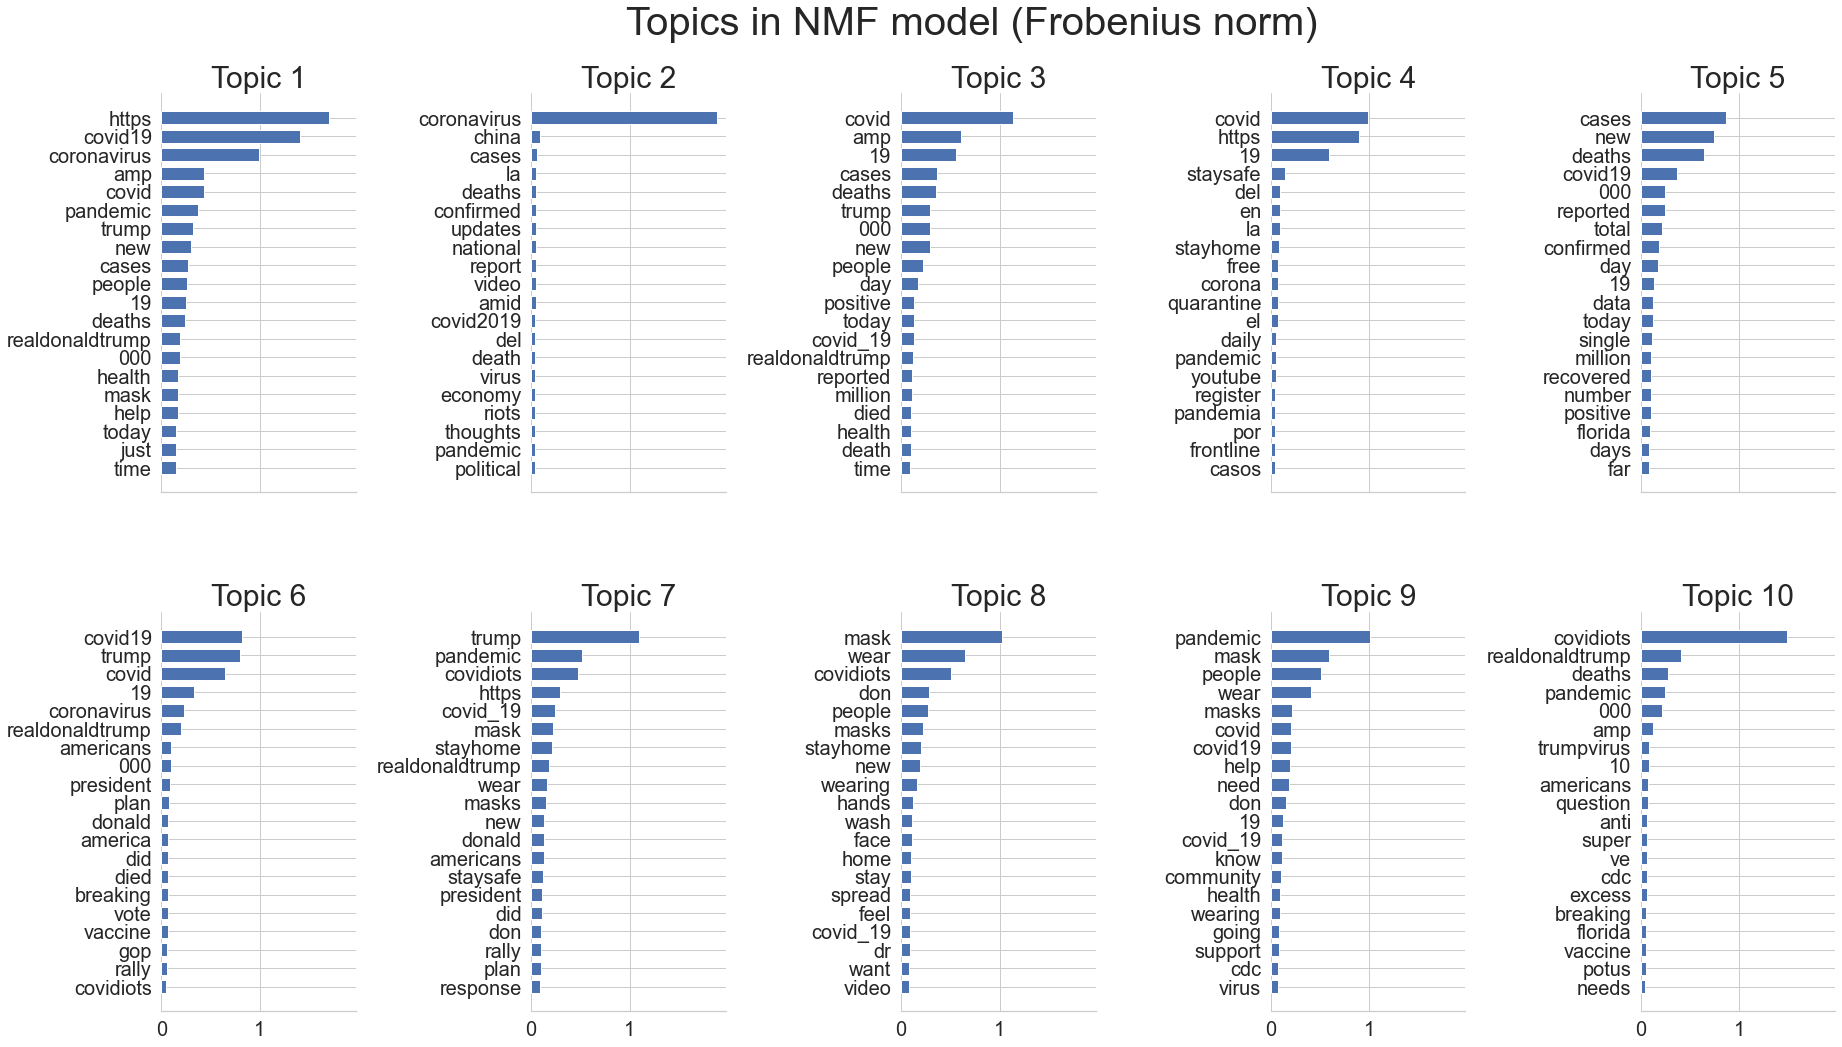



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.482s.


/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


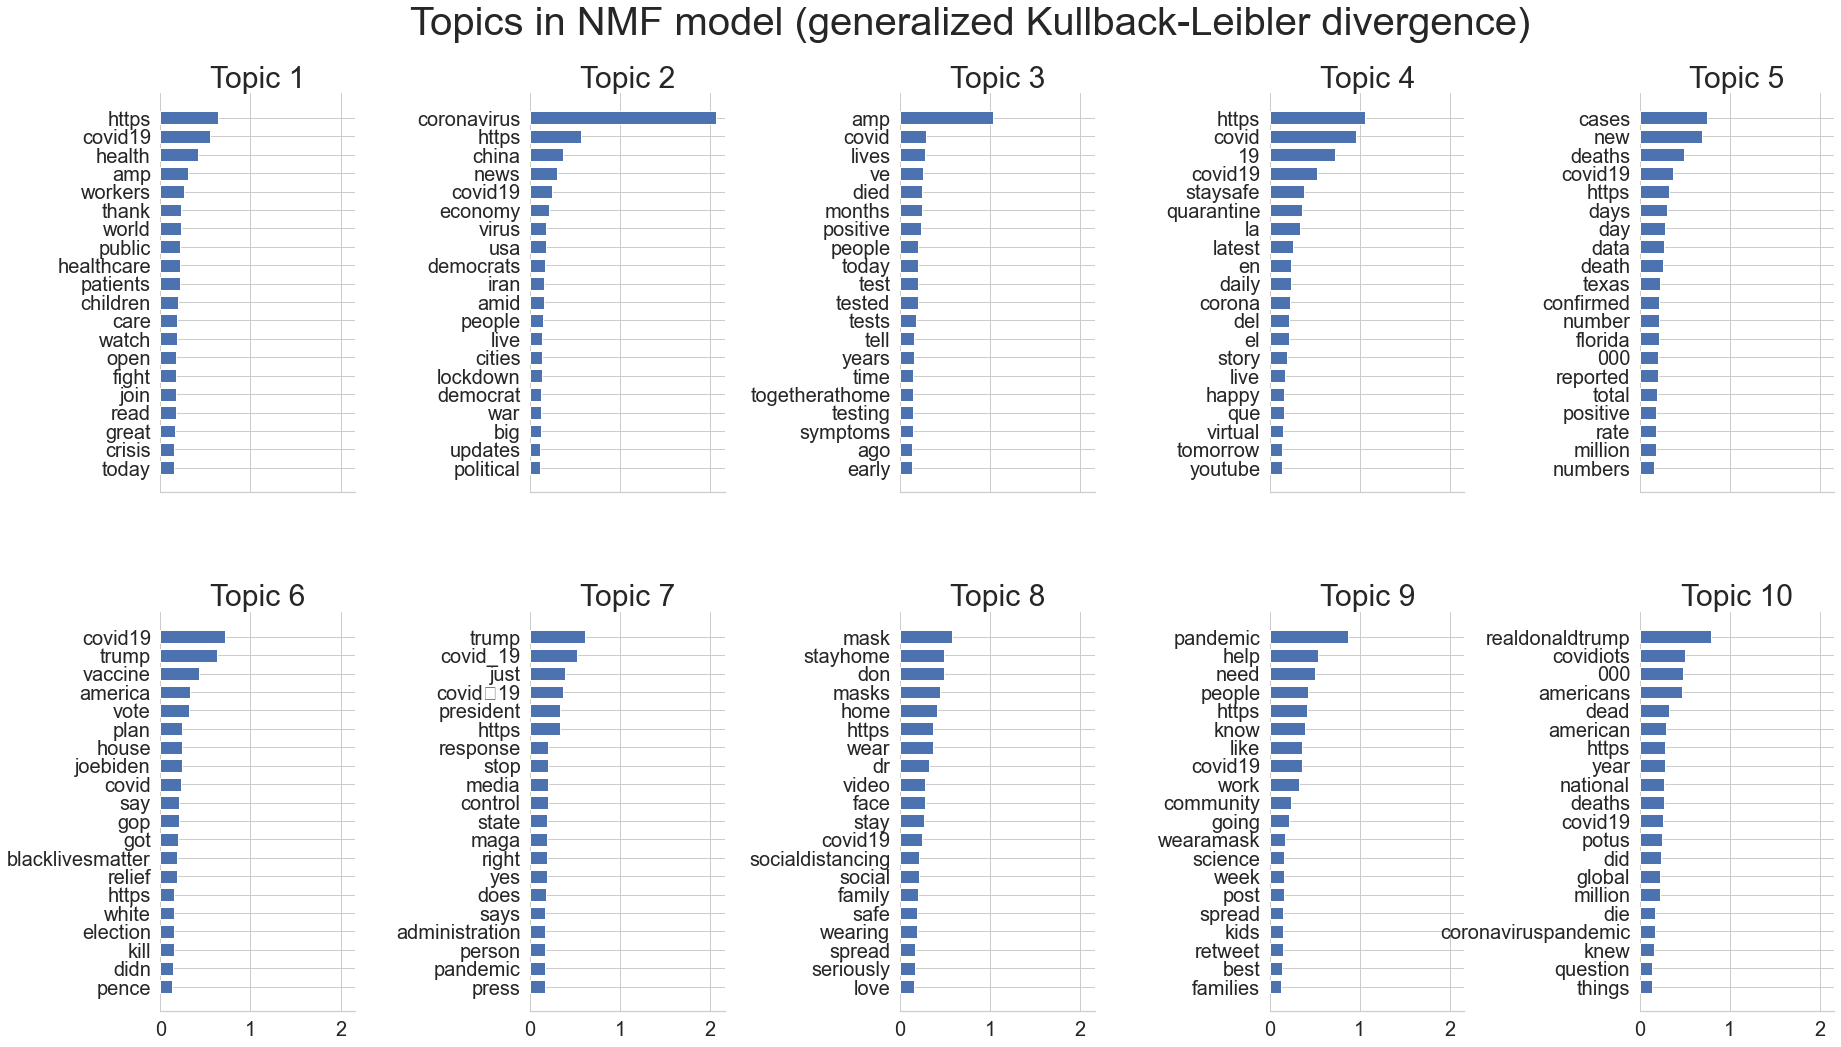



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.097s.


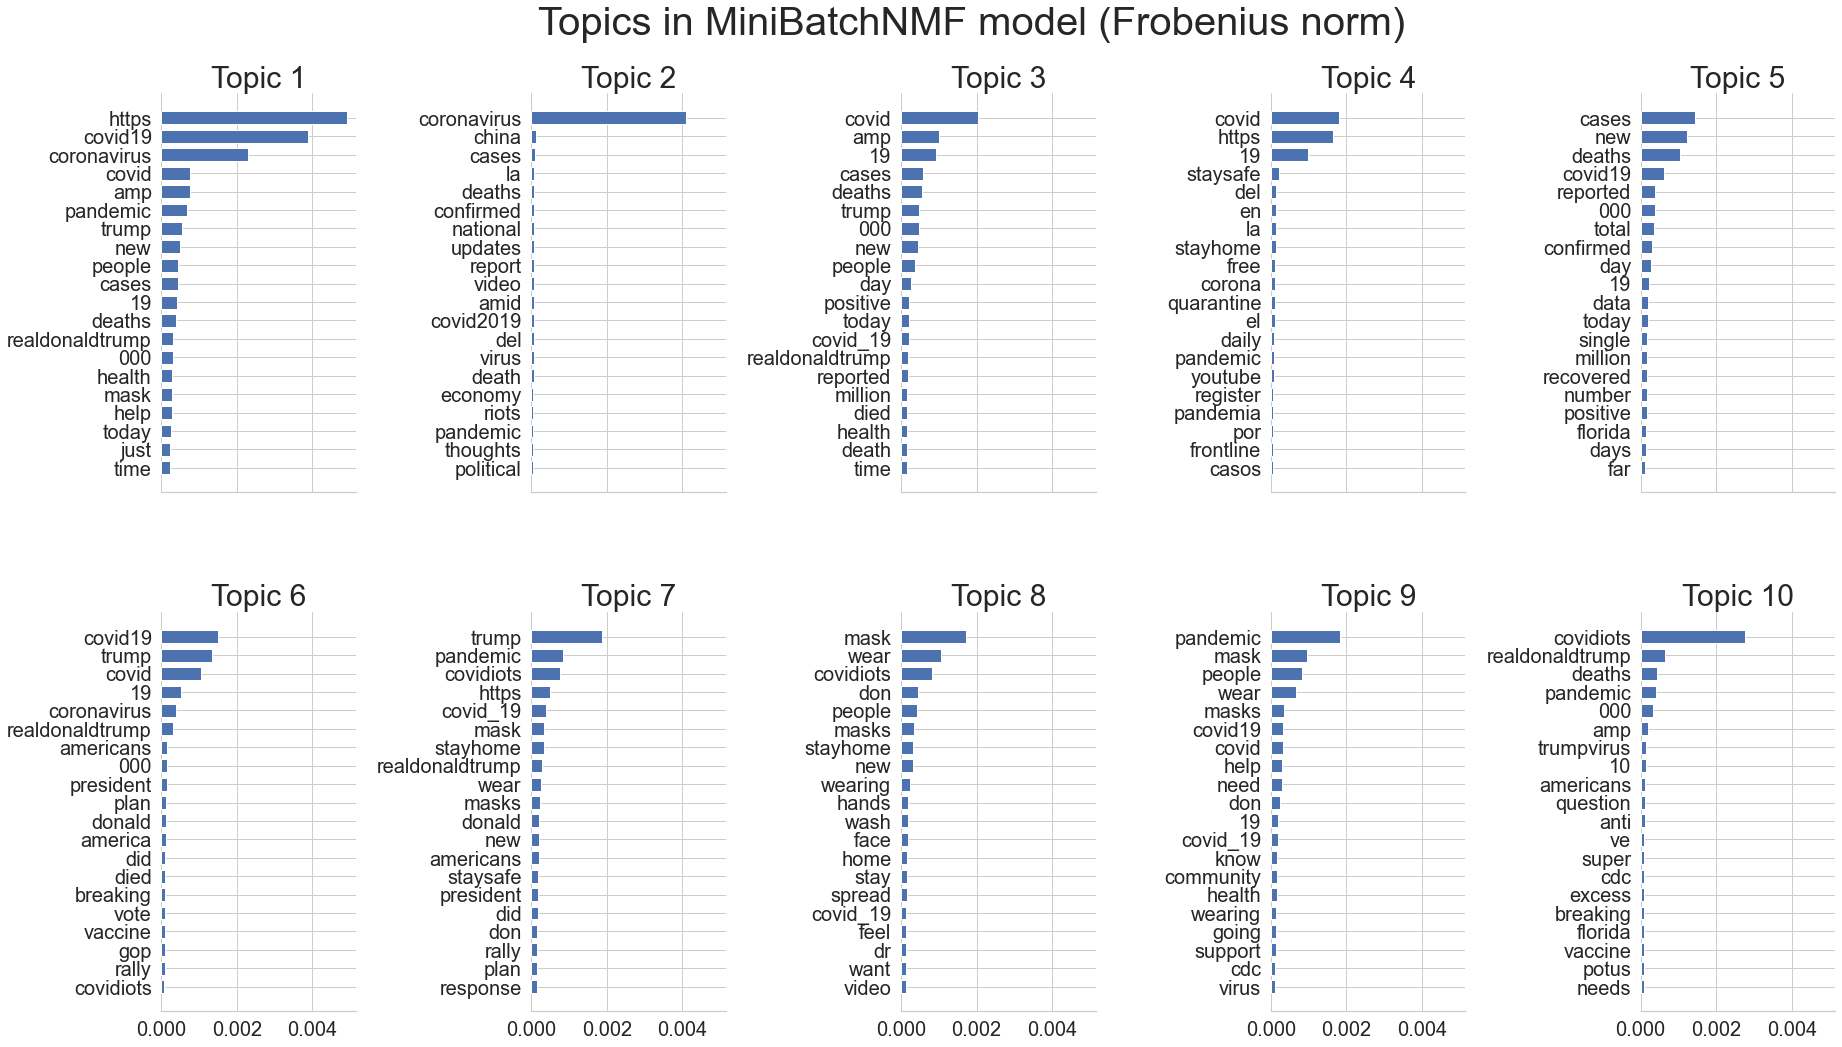



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.135s.


/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


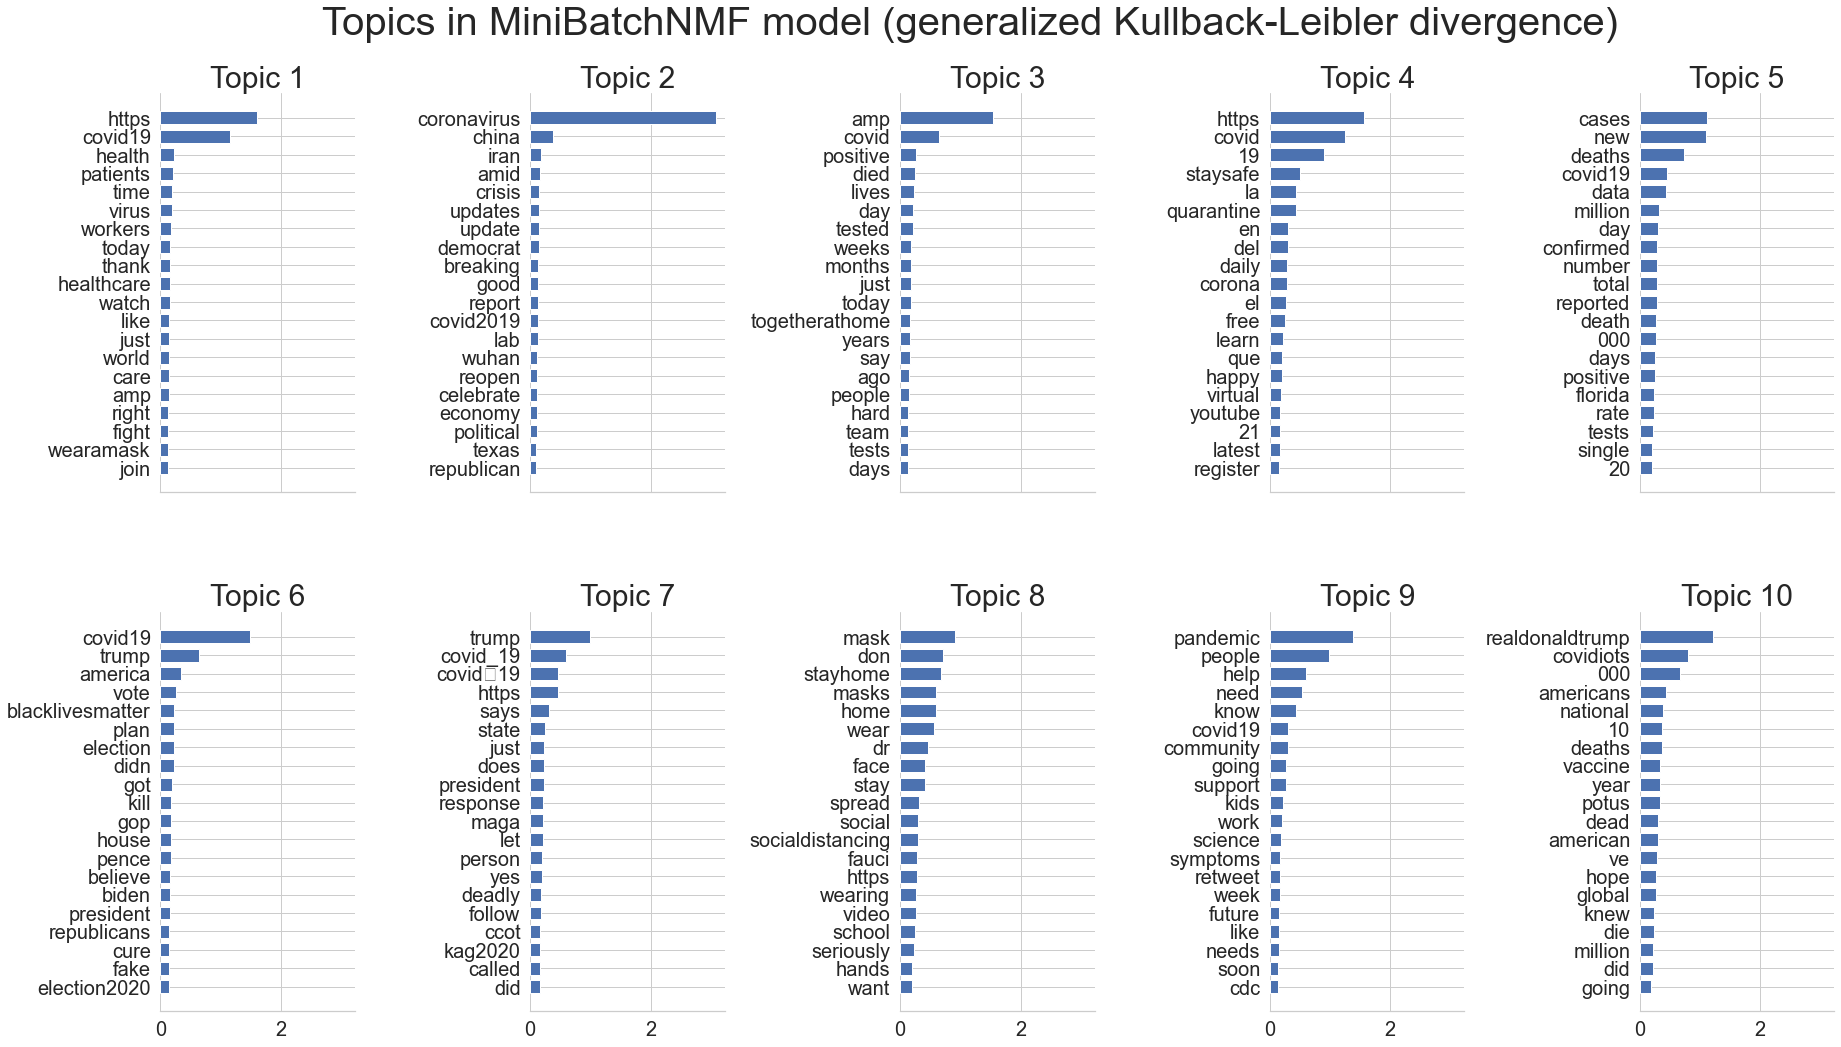



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 71.706s.


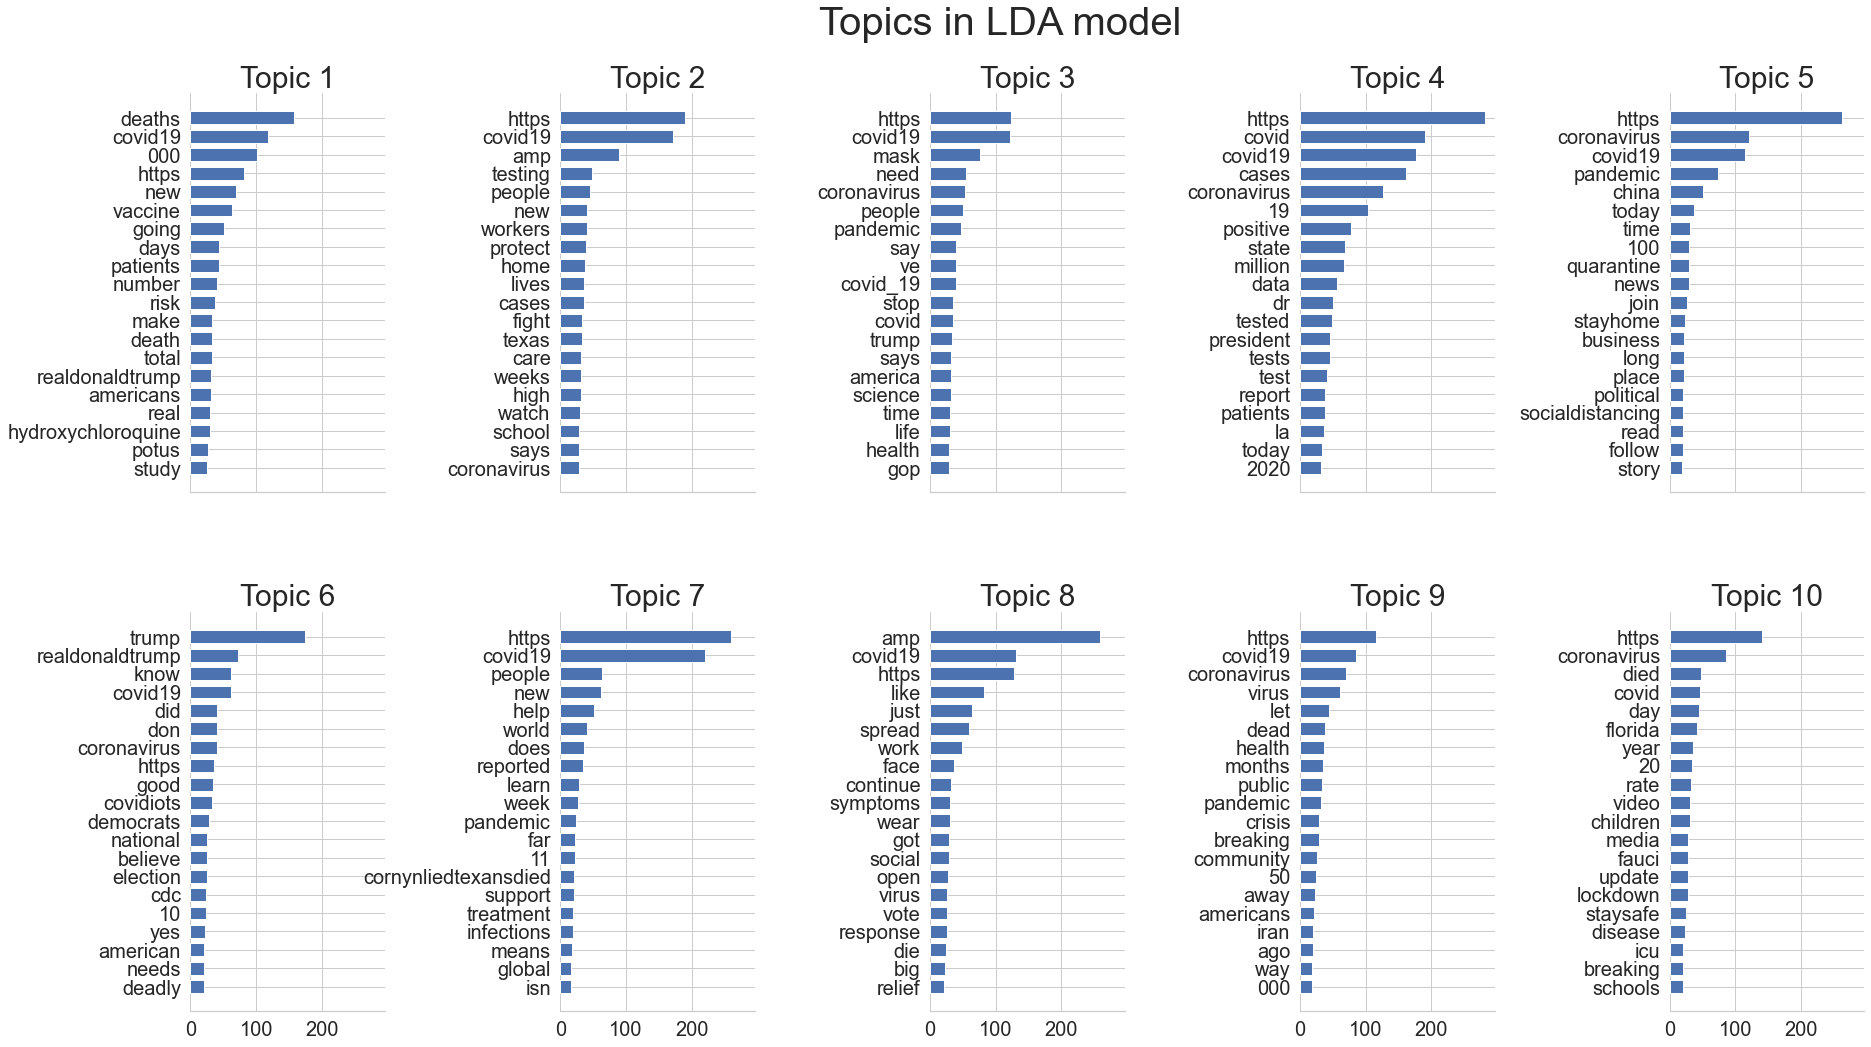

In [24]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data = df_raw['text']

data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.005,
    alpha_H=0.005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.005,
    alpha_H=0.005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.005,
    alpha_H=0.005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=500,
    learning_method="online",
    learning_offset=0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

#  Data pre-processing

In [25]:
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
import string

# Tokenizes tweets

def tweet_cleaner(tweet): 
    
    # transform all words in tweets to lower case
    tweet = tweet.lower()
    
    # remove links
    tweet = re.sub(r"http\S+", "", tweet)
    
    # remove punctuation
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # remove emojis
    emoji_list = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    tweet = re.sub(emoji_list, '', tweet)
    
    # tokenize tweets
    tweet_tokenizer = TweetTokenizer()
    text_tokenized = tweet_tokenizer.tokenize(tweet)
    
    # remove stopwords
    all_stopwords_gensim = STOPWORDS.union(set(['covid', 'covid-19', 'covid19', 'pandemic', 'coronavirus', 'corona']))
    text_filtered_1 = [word for word in text_tokenized if not word in all_stopwords_gensim]
    
    # remove words shorter than 3 characters
    text_filtered_2 = [text for text in text_filtered_1 if len(text) >= 3]
    
    return(" ".join(text_filtered_2))

In [26]:
# Tags the words in the tweets

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)

In [27]:
lemmatizer = WordNetLemmatizer()

# Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet

def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet_cleaned = tweet_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet_cleaned))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:       
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))

In [28]:
# add lemmatized tweet data as another column to the original dataframe

text_cleaned_arr = []
for tweet in df_raw.text:
    cleaned_tweet = lemmatize_tweet(tweet)
    text_cleaned_arr.append(cleaned_tweet)
    
df_raw['text_clean'] = text_cleaned_arr
df_raw

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,267,41,28,2,remember wuhancoronavirus great percentage dea...
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us,281,48,5,1,source whitehouse tactic america open amp trum...
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us,292,50,7,1,ill venture wild guess run usa crisis youd wan...
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,236,31,35,4,pakistan greenstimulus nature protection green...
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,279,35,30,3,pandémie pasteur américains qui avaient minimi...
...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,39,7,6,1,like retweets yentra mastеr
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8,interest thought thefive trump 2020 kag 2020 m...
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4,deal dont forget christians go persecution nig...
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,115,18,7,1,hit 150000 death president golf lady redecorat...


In [29]:
# Save the data frame with lemmatized tweets

df_raw.to_csv("df_with_lemmatized_tweets.csv", index=False)

In [30]:
# Import the data frame with lemmatized tweets

df_clean = pd.read_csv("df_with_lemmatized_tweets.csv", low_memory = False)
df_clean['text_clean'] = df_clean['text_clean'] .astype('str')
df_clean

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,267,41,28,2,remember wuhancoronavirus great percentage dea...
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us,281,48,5,1,source whitehouse tactic america open amp trum...
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us,292,50,7,1,ill venture wild guess run usa crisis youd wan...
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,236,31,35,4,pakistan greenstimulus nature protection green...
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,279,35,30,3,pandémie pasteur américains qui avaient minimi...
...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,39,7,6,1,like retweets yentra mastеr
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8,interest thought thefive trump 2020 kag 2020 m...
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4,deal dont forget christians go persecution nig...
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,115,18,7,1,hit 150000 death president golf lady redecorat...


# Descriptive Analysis on Clean Data

## Analyzing character and word counts for tweets

In [31]:
# Calculating character and word count for each tweet

df_clean['clean_text_char_count'] = df_clean['text_clean'].astype(str).apply(len)
df_clean['clean_text_word_count'] = df_clean['text_clean'].apply(lambda x: len(str(x).split()))
df_clean


,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,267,41,28,2,remember wuhancoronavirus great percentage dea...,151,19
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us,281,48,5,1,source whitehouse tactic america open amp trum...,171,27
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us,292,50,7,1,ill venture wild guess run usa crisis youd wan...,148,27
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,236,31,35,4,pakistan greenstimulus nature protection green...,147,16
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,279,35,30,3,pandémie pasteur américains qui avaient minimi...,205,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,39,7,6,1,like retweets yentra mastеr,27,4
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8,interest thought thefive trump 2020 kag 2020 m...,86,11
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4,deal dont forget christians go persecution nig...,179,24
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,115,18,7,1,hit 150000 death president golf lady redecorat...,60,9


In [32]:
# Calculating the mean, median, maximum and minimum of word count and character count of tweets

table = [['Attribute', 'Aggregation Type', 'Value'], 
         ['Character Count', 'mean', round((df_clean.clean_text_char_count.mean()),2)], 
         ['', 'median', round((df_clean.clean_text_char_count.median()),2)],
         ['', 'max', round((df_clean.clean_text_char_count.max()),2)], 
         ['', 'min', round((df_clean.clean_text_char_count.min()),2)],
         ['Word Count', 'mean', round((df_clean.clean_text_word_count.mean()),2)], 
         ['', 'median', round((df_clean.clean_text_word_count.median()),2)],
         ['', 'max', round((df_clean.clean_text_word_count.max()),2)], 
         ['', 'min', round((df_clean.clean_text_word_count.min()),2)]]
print(tabulate(table, headers='firstrow'))

Attribute        Aggregation Type      Value
---------------  ------------------  -------
Character Count  mean                 112.13
                 median               116
                 max                  316
                 min                    2
Word Count       mean                  14.86
                 median                15
                 max                   44
                 min                    1


## Analyzing frequency of words in cleaned tweets


In [33]:
# Splitting each tweet into individual words

words_in_tweet = [str(tweet).lower().split() for tweet in df_clean.text_clean]

# List of all words across tweets

all_words = list(itertools.chain(*words_in_tweet))

# Create a word frequency counter

word_freq = collections.Counter(all_words)
top_10_words_freq = word_freq.most_common(10)
top_10_words_freq

[('amp', 45165),
 ('case', 25477),
 ('new', 24486),
 ('people', 22965),
 ('test', 19252),
 ('death', 18444),
 ('day', 14883),
 ('health', 13505),
 ('trump', 13151),
 ('need', 12933)]

In [34]:
top_10_words = []

for i in range(0,10):
    word = top_10_words_freq[i][0]
    top_10_words.append(word)
    
top_10_words

['amp',
 'case',
 'new',
 'people',
 'test',
 'death',
 'day',
 'health',
 'trump',
 'need']

In [35]:
countries = df_raw.country.unique()
countries

array(['us', 'uk', 'canada', 'australia', 'ireland', 'new_zealand'],
      dtype=object)

In [36]:
df_top_10_words_by_country = pd.DataFrame(columns=['country', 'word','freq'])

for country in countries:
    df_clean_country = df_clean[df_clean.country == country]
    words_in_tweet = [str(tweet).lower().split() for tweet in df_clean_country.text_clean]
    all_words = list(itertools.chain(*words_in_tweet))
    for word in top_10_words:
        freq = all_words.count(word)
        df_top_10_words_curr_country = pd.DataFrame([[country, word, freq]], columns = ['country', 'word','freq'])
        df_top_10_words_by_country = pd.concat([df_top_10_words_by_country, df_top_10_words_curr_country])
    
df_top_10_words_by_country.reset_index().drop(columns='index')

,country,word,freq
0,us,amp,6934
1,us,case,4018
2,us,new,3596
3,us,people,3877
4,us,test,3526
5,us,death,3518
6,us,day,2523
7,us,health,2023
8,us,trump,4765
9,us,need,2101


In [37]:
df_top_10_words_by_country = df_top_10_words_by_country.groupby(['country', 'word'])['freq'].sum().unstack().fillna(0)
df_top_10_words_by_country

word,amp,case,day,death,health,need,new,people,test,trump
country,,,,,,,,,,
australia,7932,5034,2303,2583,2311,2020,3850,3638,2867,2066
canada,6825,4523,2166,3074,2371,2180,4297,3621,3128,1241
ireland,8293,3287,2901,2896,2467,2404,3365,4302,2671,1086
new_zealand,7937,5607,2709,3244,2271,2055,5742,3621,3661,2392
uk,7244,3008,2281,3129,2062,2173,3636,3906,3399,1601
us,6934,4018,2523,3518,2023,2101,3596,3877,3526,4765


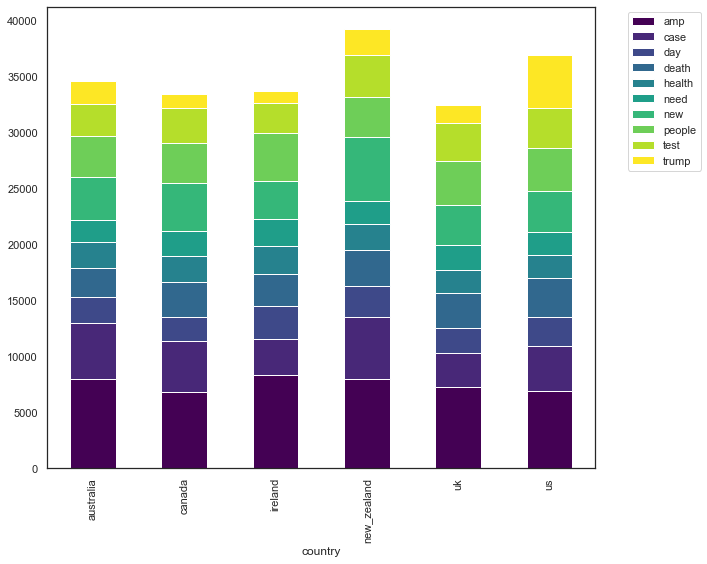

In [38]:
plt.rcParams["figure.figsize"] = (10,8)

#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
df_top_10_words_by_country.plot(kind='bar', stacked=True, cmap="viridis")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.show()

## Latent Dirichlet Allocation (LDA)

In [39]:
df_clean_lda = df_clean.copy(deep = True)
df_clean_lda

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,FALSE,TRUE,WuhanCoronaVirus KillerCuomo,us,267,41,28,2,remember wuhancoronavirus great percentage dea...,151,19
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,FALSE,TRUE,Trump,us,281,48,5,1,source whitehouse tactic america open amp trum...,171,27
2,I'll venture a wild guess: If you were running...,NaN,FALSE,TRUE,COVID19,us,292,50,7,1,ill venture wild guess run usa crisis youd wan...,148,27
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,FALSE,TRUE,Pakistan GreenStimulus Nature Green,us,236,31,35,4,pakistan greenstimulus nature protection green...,147,16
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,FALSE,TRUE,coronavirus COVID__19 COVIDー19,us,279,35,30,3,pandémie pasteur américains qui avaient minimi...,205,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,TRUE,TRUE,Mastеr,new_zealand,39,7,6,1,like retweets yentra mastеr,27,4
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,FALSE,TRUE,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8,interest thought thefive trump 2020 kag 2020 m...,86,11
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,TRUE,TRUE,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4,deal dont forget christians go persecution nig...,179,24
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,FALSE,TRUE,COVID19,new_zealand,115,18,7,1,hit 150000 death president golf lady redecorat...,60,9


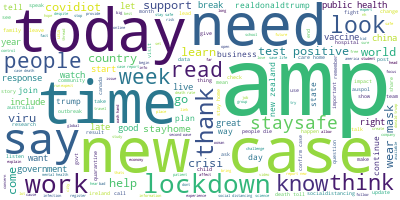

In [40]:
plt.rcParams["figure.figsize"] = (10,8)

# Join the different processed tweets together
long_string = ','.join(list(df_clean_lda['text_clean'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

/Users/haileythanki/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


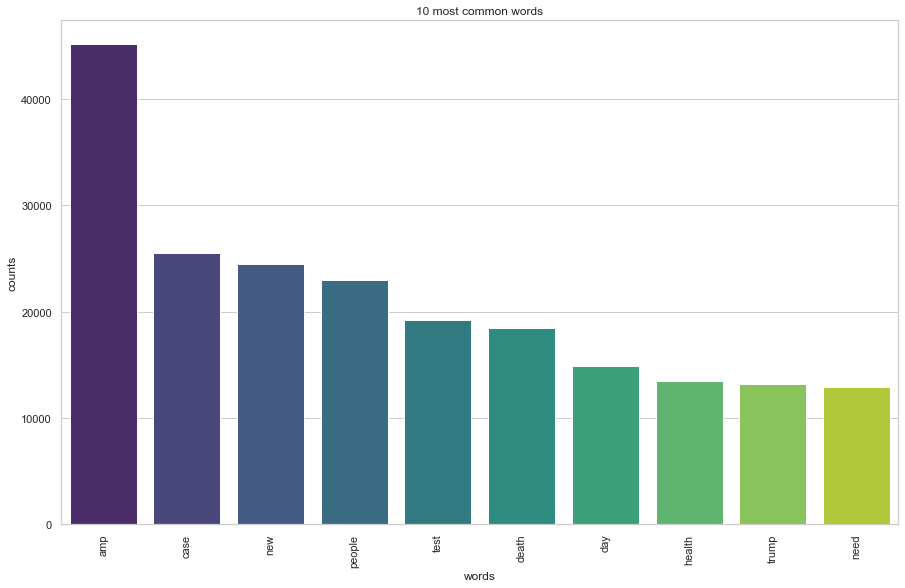

In [41]:
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words))
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc=
    {"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='viridis')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_clean_lda['text_clean'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [42]:
p_df = pd.read_csv("df_with_lemmatized_tweets.csv", low_memory = False)
p_df['text_clean'] = p_df['text_clean'].astype('str')
docs = array(p_df['text_clean'])

In [43]:
def docs_preprocessor(docs):
    tokenizer = RegexpTokenizer(r'\w+')
    for idx in range(len(docs)):
        docs[idx] = docs[idx].lower()  # Convert to lowercase.
        docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

    # Remove numbers, but not words that contain numbers.
    docs = [[token for token in doc if not token.isdigit()] for doc in docs]
    
    # Remove words that are only one character.
    docs = [[token for token in doc if len(token) > 3] for doc in docs]
    
    # Lemmatize all words in documents.
    lemmatizer = WordNetLemmatizer()
    docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]
  
    return docs

docs = docs_preprocessor(docs)

In [44]:
# Add bigrams and trigrams to docs (only ones that appear 10 times or more)

bigram = Phrases(docs, min_count=100)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [45]:
# Create a dictionary representation of the tweets

dictionary = Dictionary(docs)
print('Number of unique words in initital documents:', len(dictionary))

# Filter out words that occur less than 1000 tweets, or more than 50% of the tweets

dictionary.filter_extremes(no_below=1000, no_above=0.5)
print('Number of unique words after removing rare and common words:', len(dictionary))


Number of unique words in initital documents: 255752
Number of unique words after removing rare and common words: 498


In [46]:
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of tweets: %d' % len(corpus))

Number of unique tokens: 498
Number of tweets: 240000


In [47]:
# Set training parameters

num_topics = 10
chunksize = 500 # size of the tweet looked at every pass
passes = 20 # number of passes through tweets
iterations = 400
eval_every = 1  

# Make an index to word dictionary

temp = dictionary[0] 
id2word = dictionary.id2token

%time model = LdaModel(corpus = corpus, id2word = id2word, chunksize = chunksize, alpha = 'auto', \
                       eta = 'auto', iterations = iterations, num_topics = num_topics, passes  =passes, \
                       eval_every = eval_every)

CPU times: user 9min 43s, sys: 1.04 s, total: 9min 44s
Wall time: 9min 44s


In [48]:
# feed the LDA model into the pyLDAvis instance

lda_viz = gensimvis.prepare(model, corpus, dictionary)

/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/haileythanki/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/hailey

In [49]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.312261 -0.000250       1        1  18.482042
1     -0.081988 -0.364131       2        1  12.999923
3     -0.080812  0.326029       3        1  11.648395
7     -0.079178  0.027908       4        1   9.811170
5      0.312409 -0.001031       5        1   9.762058
6     -0.077481  0.008739       6        1   8.298655
2     -0.077002  0.006939       7        1   8.149534
0     -0.076618  0.000374       8        1   7.359784
4     -0.076235  0.002885       9        1   7.310792
8     -0.075357 -0.007462      10        1   6.177645, topic_info=        Term          Freq         Total Category  logprob  loglift
80      case  29596.000000  29596.000000  Default  30.0000  30.0000
68      test  20225.000000  20225.000000  Default  29.0000  29.0000
0      death  18782.000000  18782.000000  Default  28.0000  28.0000
49    people  21362.000000  21362.000000  Default  27.0000  27.0000
14    health  13291.000000  13291.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
409   monday   1100.276572   1101.158673  Topic10  -4.3713   2.7834
13    demand   1081.245134   1082.127236  Topic10  -4.3888   2.7834
487  johnson   1070.032060   1070.914100  Topic10  -4.3992   2.7834
280     wash   1048.287742   1049.169712  Topic10  -4.4197   2.7834
156     slow    989.678188    990.560254  Topic10  -4.4772   2.7833

[332 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
454       2  0.999323     access
268       8  0.999081     accord
401       6  0.999746     action
484       5  0.999753     active
483       7  0.999680     advice
...     ...       ...        ...
307       8  0.999548      write
58        4  0.999780       year
59        8  0.999661  yesterday
436       9  0.999622      youre
428       7  0.999854    zealand

[302 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 2, 4, 8, 6, 7, 3, 1, 5, 9])

## Non-negative matrix factorization

Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 0.040s.
Extracting tf features for LDA...
done in 0.031s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.095s.


/Users/haileythanki/.local/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


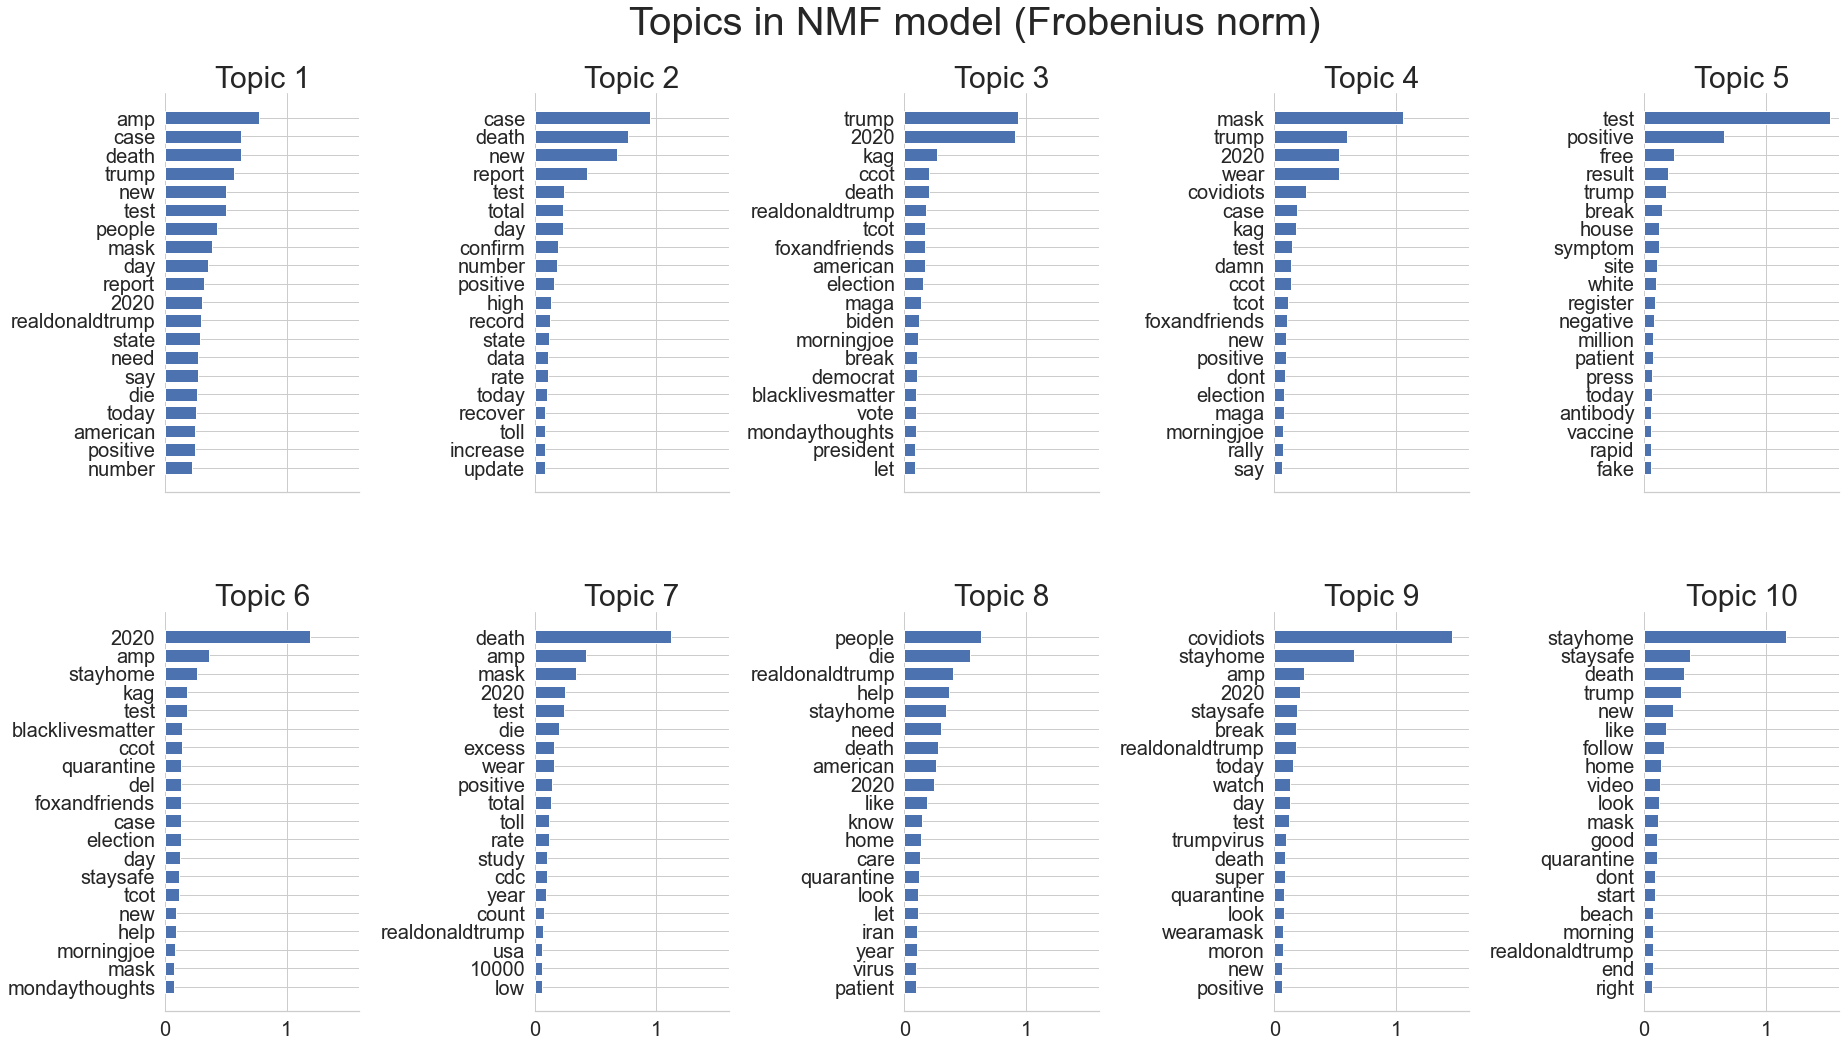



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.395s.


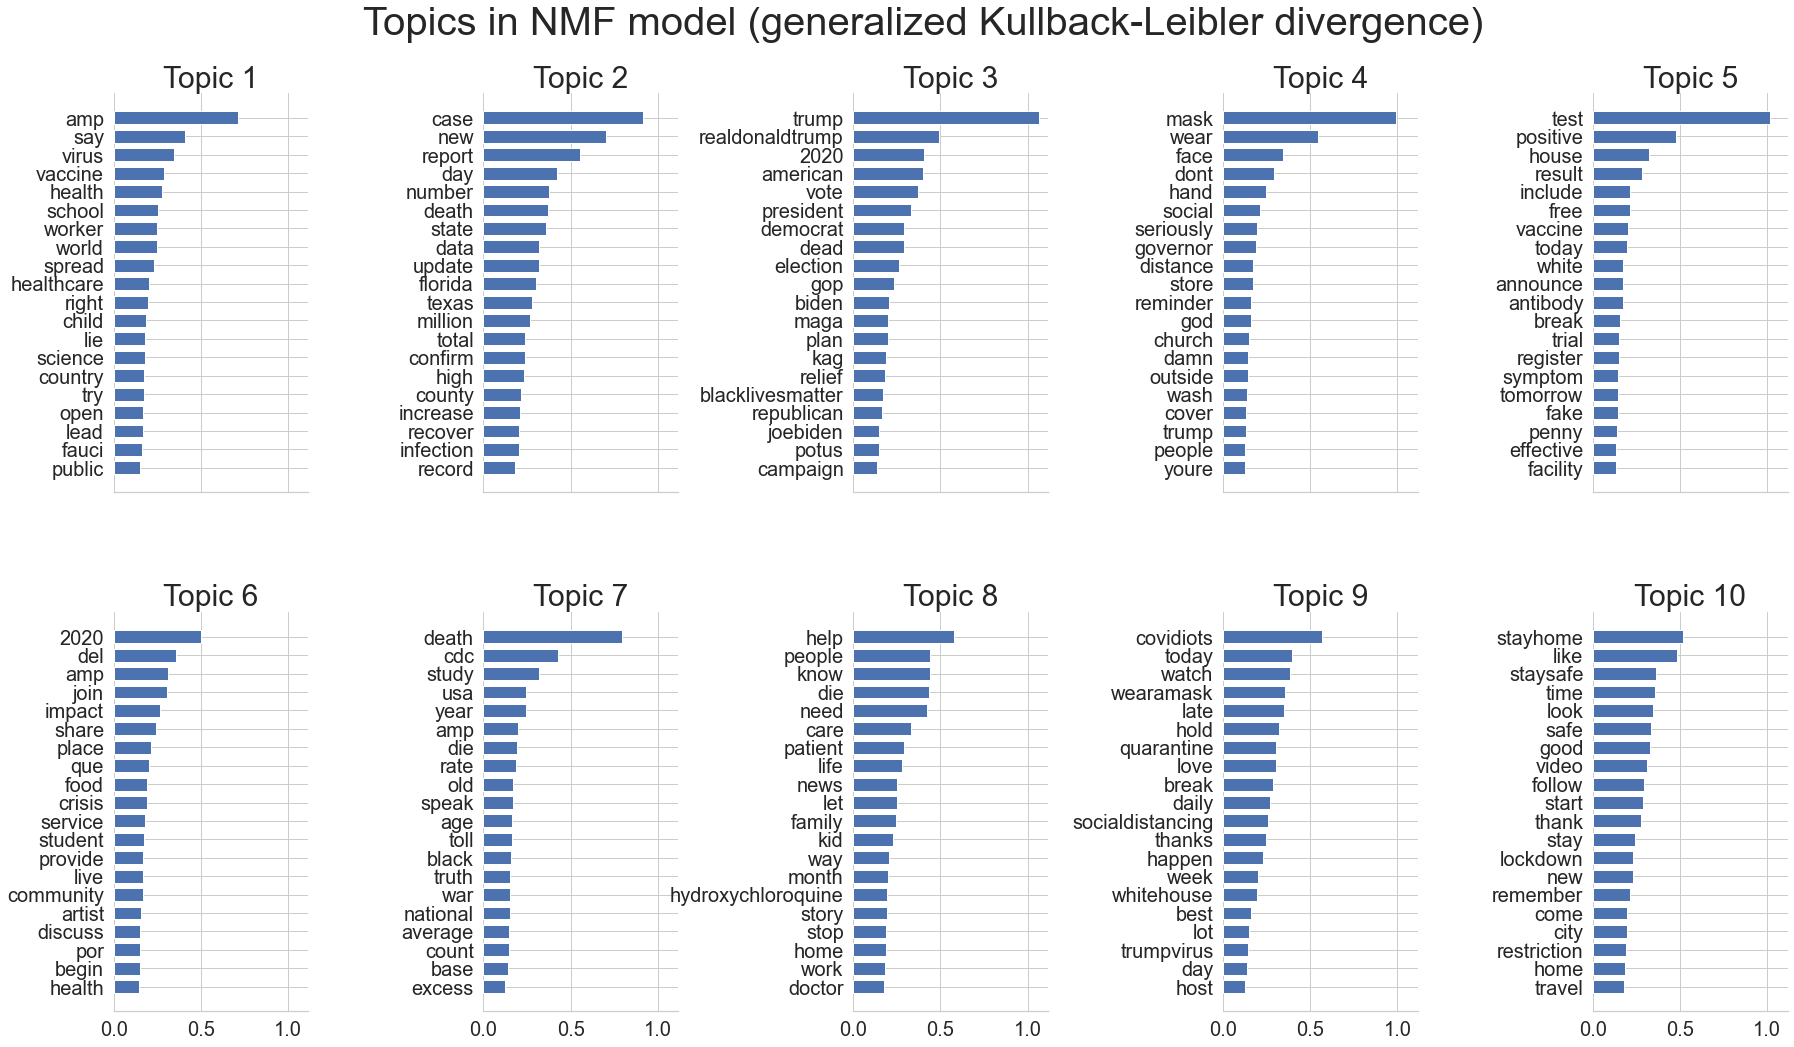



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.077s.


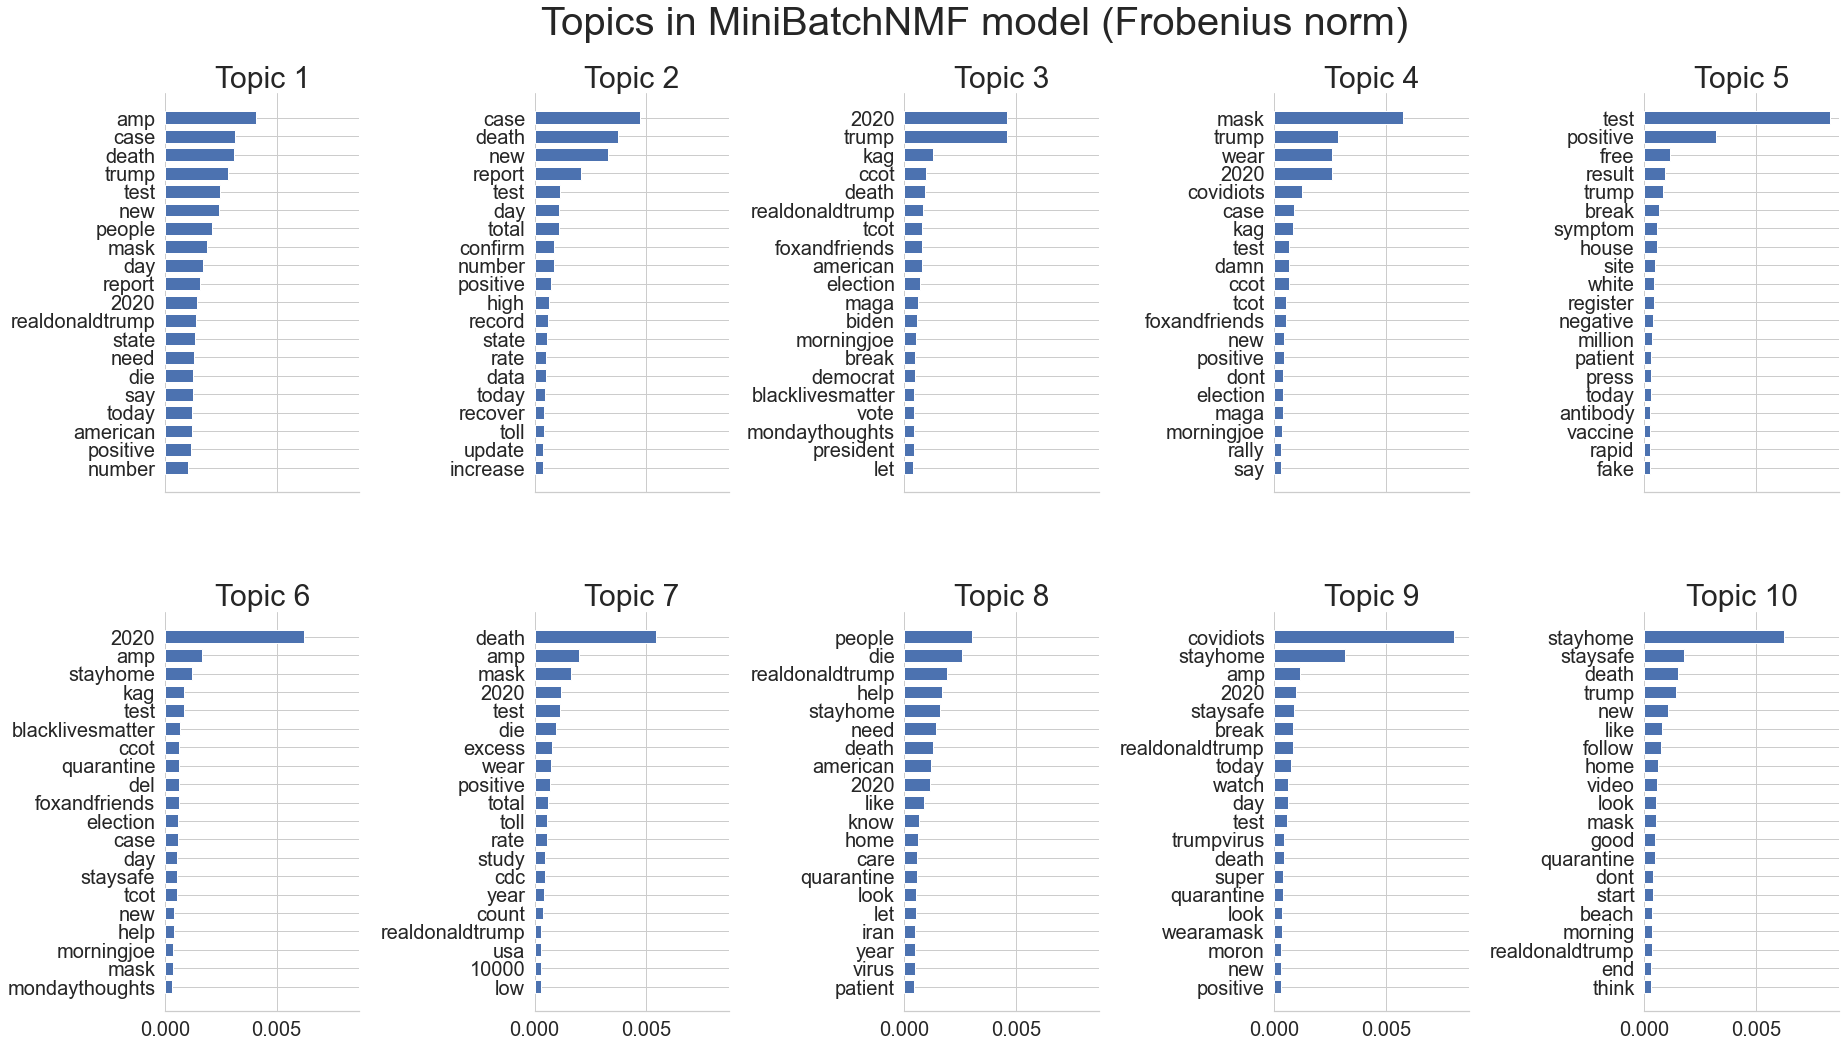



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.150s.


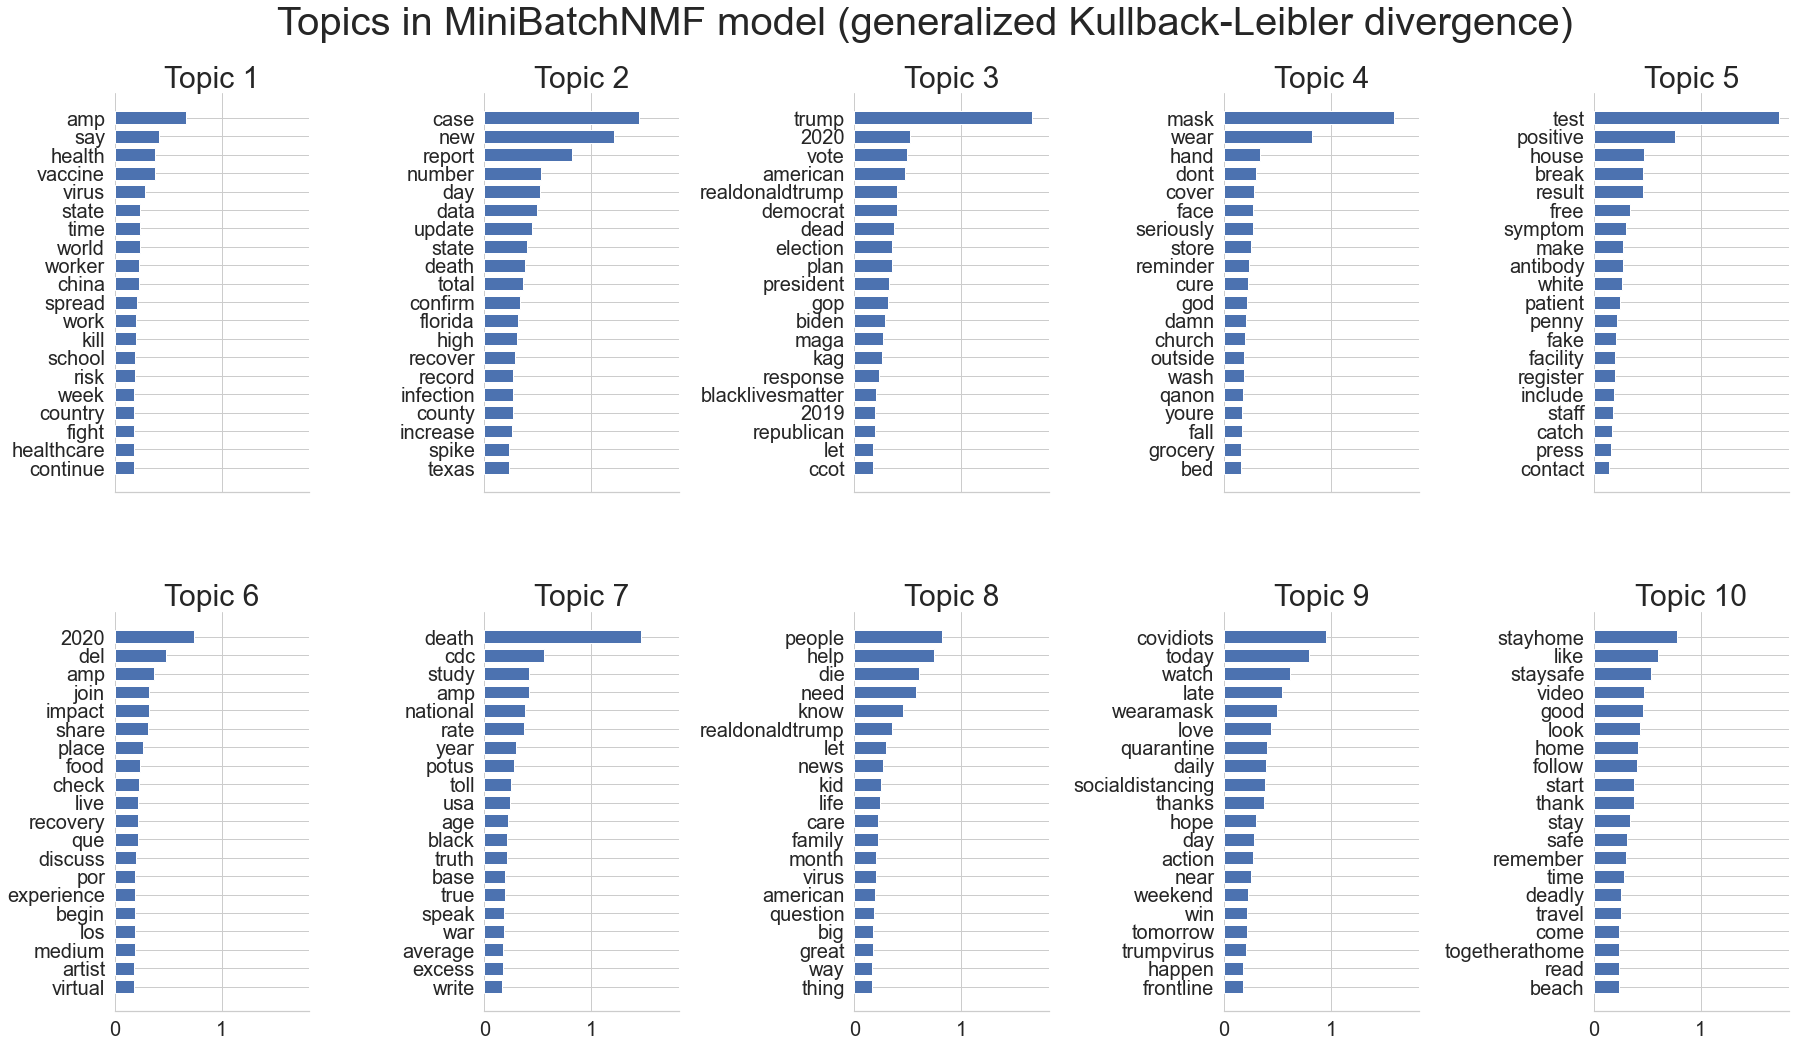



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 59.585s.


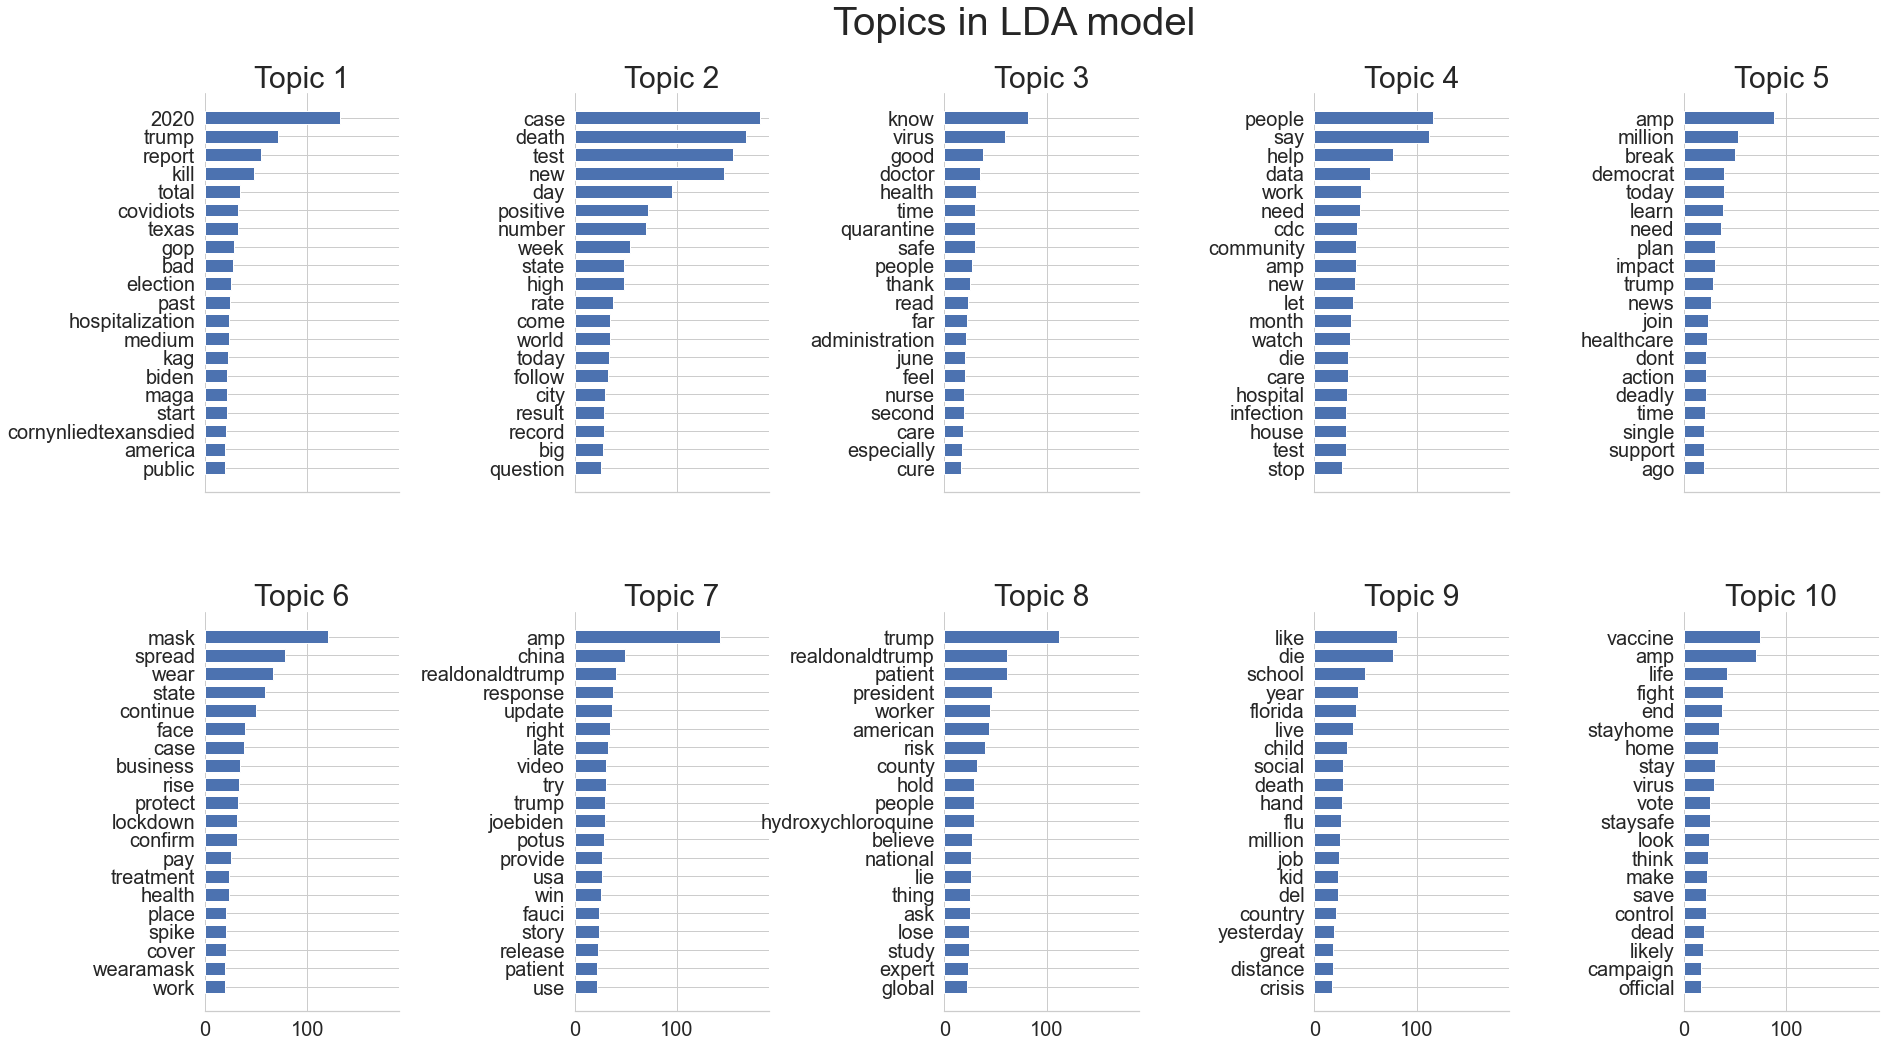

In [50]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause


n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


print("Loading dataset...")
t0 = time()
data = df_clean['text_clean']

data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.005,
    alpha_H=0.005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.005,
    alpha_H=0.005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.005,
    alpha_H=0.005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=500,
    learning_method="online",
    learning_offset=0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [51]:
df_clean_lda.to_csv('df_with_lemmatized_tweets.csv', index=False)

## Cosine similarity

In [52]:
df = pd.read_csv('df_with_lemmatized_tweets.csv')
df

/var/folders/_y/ch74wgzn7s1dxtq4ysb993sr0000gn/T/ipykernel_61326/547425379.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('df_with_lemmatized_tweets.csv')


,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,267,41,28,2,remember wuhancoronavirus great percentage dea...,151,19
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,281,48,5,1,source whitehouse tactic america open amp trum...,171,27
2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,292,50,7,1,ill venture wild guess run usa crisis youd wan...,148,27
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,236,31,35,4,pakistan greenstimulus nature protection green...,147,16
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,279,35,30,3,pandémie pasteur américains qui avaient minimi...,205,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,39,7,6,1,like retweets yentra mastеr,27,4
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8,interest thought thefive trump 2020 kag 2020 m...,86,11
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4,deal dont forget christians go persecution nig...,179,24
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,115,18,7,1,hit 150000 death president golf lady redecorat...,60,9


In [53]:
df.hashtags.dtypes

dtype('O')

In [54]:
df.hashtags[0].split(' ')

['WuhanCoronaVirus', 'KillerCuomo']

In [55]:
# creating an array containing all hastags in the dataset

hashtag_arr = []

for hashtag in df.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr.append(hashtag_temp)
    
hashtag_arr

['WuhanCoronaVirus',
 'KillerCuomo',
 'Trump',
 'COVID19',
 'Pakistan',
 'GreenStimulus',
 'Nature',
 'Green',
 'coronavirus',
 'COVID__19',
 'COVIDー19',
 'corona',
 'virus',
 'meme',
 'coronavirusmeme',
 'toilet',
 'paper',
 'coronapocalypse',
 'Coronavirus',
 'blacklifematters',
 'COVID19',
 'StopPoliceBrutality',
 'corona',
 'TheAcademy',
 'AcademyAwards',
 'Oscars',
 'TheOscars',
 'AMPAS',
 'FilmTwitter',
 'WuhanVirus',
 'art',
 'artists',
 'photography',
 'Photographer',
 'coronavirus',
 'Covid_19',
 'COVID19',
 'PAHouse',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'BREAKING',
 'coronavirus',
 'VOTE',
 'COVID19',
 'Covid_19',
 'NorthCarolina',
 'Trump2020',
 'KAG2020',
 'SaturdayThoughts',
 'Ccot',
 'Trump',
 'Hydroxychloroquine',
 'coronavirus',
 'Science',
 'BrightSpot',
 'kswx',
 'COVID19',
 'IAQ',
 'sustainability',
 'trane',
 'COVID19',
 'CoronaVirus',
 'AnikaChebrolu',
 'ShowMeYourMask',
 'MaskUp',
 'WeCanStopCOVIDTogether',
 'ScienceMatters',
 'disability',
 'COVID19'

In [56]:
# creating an array containing only the unique hashtags

unique_hastags = set(hashtag_arr)
unique_hastags

{'familypreservation',
 'MushroomPowder',
 'BANG',
 'LordHoweIsland',
 'digitalart',
 'CIHR',
 'QuarantineChronicles',
 'GOPLies',
 'Blanquer',
 'pga',
 'patio',
 'TobaccoHarmReduction',
 'Qanons',
 'SuspiciousObserver',
 'noexcuses',
 'wildbirds',
 'EdBartlett',
 'ham',
 'canoncamera',
 'Gambling',
 'covidnurses',
 'makeup',
 'nvac',
 'BCSchoolCovidTracker',
 'TheRookie',
 'DigitalBanking',
 'Kirklees',
 'assad',
 'newbeginnings',
 'personas',
 'cizaseason',
 'icantbreathe',
 'Impeachment',
 'damage',
 'Tits',
 'InformedCommunities',
 'hairstylesforheroes',
 '808day',
 'DragRace',
 'infectadura',
 'PlayingADifferentGame',
 'Protestas',
 'physicianAssistants',
 'DementiaDon',
 'advicefys',
 'SCGuard',
 'northernireland',
 'techno',
 'UKHeatWave',
 'Lanarkshire',
 'HearFarrakhan',
 'rotter',
 'WorldNewsDay',
 'DCA',
 'SweetSixteen',
 'TakeAction',
 'Product',
 'practitioners',
 'CoronaVirusIreland',
 'LocalPropertyTax',
 'Wankers',
 'Moodle',
 'ReahChakraborty',
 'Handmade',
 'PEPFARWat

In [57]:
# Creating subsets of dataset for the us

df_us = df[df.country == 'us']
df_us

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
0,Remember the #WuhanCoronaVirus? The pandemic w...,NaN,False,True,WuhanCoronaVirus KillerCuomo,us,267,41,28,2,remember wuhancoronavirus great percentage dea...,151,19
1,My sources @WhiteHouse say 2 tactics will be u...,NaN,False,True,Trump,us,281,48,5,1,source whitehouse tactic america open amp trum...,171,27
2,I'll venture a wild guess: If you were running...,NaN,False,True,COVID19,us,292,50,7,1,ill venture wild guess run usa crisis youd wan...,148,27
3,#Pakistan (#GreenStimulus = #Nature protection...,NaN,False,True,Pakistan GreenStimulus Nature Green,us,236,31,35,4,pakistan greenstimulus nature protection green...,147,16
4,🇺🇸 Pandémie de #coronavirus: 30 pasteurs améri...,NaN,False,True,coronavirus COVID__19 COVIDー19,us,279,35,30,3,pandémie pasteur américains qui avaient minimi...,205,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,#FluKluxKlan with racist Gadsden flags #StayHo...,NaN,True,False,FluKluxKlan StayHomeSaveLives Reopen Covidiots...,us,124,10,68,5,flukluxklan racist gadsden flag stayhomesaveli...,88,8
39996,"Today's the day! @BlueAngels, @AFThunderbirds ...",NaN,False,True,COVID19,us,202,20,7,1,today day blueangels afthunderbirds salute mar...,110,12
39997,Contrary to predictions that #Covid19 economic...,NaN,True,False,Covid19,us,283,38,7,1,contrary prediction economic recovery mimic re...,201,25
39998,WATCH: @GovJanetMills leads Maine's #COVID19 r...,NaN,False,False,COVID19,us,257,30,7,1,watch govjanetmills lead maine remote medium b...,153,19


In [58]:
# Creating a set of unique hashtags for the us

hashtag_arr_us = []

for hashtag in df_us.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr_us.append(hashtag_temp)
    
unique_hashtags_us = set(hashtag_arr_us)
unique_hashtags_us

{'smallbusinesses',
 'GilletsJaunes',
 'Newark',
 'digitalart',
 'QuarantineChronicles',
 'GOPLies',
 'meanmuggz',
 'workingfromhome',
 'COVID19Response',
 'Stupid',
 'HeathenInChief',
 'TroubleBreathing',
 'TrumpKnewVoteBlue',
 'Qanons',
 'SuspiciousObserver',
 'poll',
 'Resign',
 'netde',
 'EmergencyAssistance',
 'workplace',
 'Gambling',
 'covidnurses',
 'makeup',
 'OHP',
 '21May',
 'sunset',
 'givethedrummersome',
 'Innovation',
 'assad',
 'lps',
 'MartialLaw',
 'gospel',
 'Cannabis',
 'postapocalyptic',
 'newbeginnings',
 'KuruluşOsman',
 'Impeachment',
 'damage',
 'HomeHealthcare',
 'GeorgeGate',
 'DragRace',
 'fakedemic',
 'OpenUp',
 'hypocrites',
 'mystery',
 'Protestas',
 'KrackenReleased',
 'physicianAssistants',
 'FrançaisdelEtranger',
 'PutinsPuppet',
 'Cobra',
 'wreathsofinstagram',
 'TrumpDevastation',
 'HearFarrakhan',
 'nude',
 'SweetSixteen',
 'WISCONSINITES',
 'SupportingFarmers',
 'onlineclasses',
 'LIES',
 'Kolkata',
 '2AñosDeLegalidad',
 'cornavirus',
 '트와이스',
 'PE

In [59]:
# Creating subsets of dataset for the uk

df_uk = df[df.country == 'uk']
df_uk

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
40000,Hardware has been more negatively impacted by ...,NaN,False,False,COVID19,uk,170,22,7,1,hardware negatively impact software service ac...,77,9
40001,"This week, hackers made headlines for targetin...",NaN,False,True,COVID19,uk,234,29,7,1,week hacker headline target research nasa pres...,103,13
40002,"In the last week, refugee camps in #Syria and ...",NaN,False,True,Syria Greece COVID19,uk,235,33,20,3,week refugee camp syria greece confirm case ad...,128,16
40003,Yes. You get to start your own for-profit #Cov...,NaN,False,True,Covid,uk,92,12,5,1,yes start forprofit consulting company,38,5
40004,I’ve cared for somebody with #Covid_19 in my h...,NaN,False,True,Covid_19,uk,284,56,8,1,care somebody house take hydroxychloroquine vi...,87,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,“We are more and more anxious. We can’t go out...,NaN,False,True,CCPVirus,uk,278,40,8,1,anxious door earn money amid 3rdwave ccpvirus ...,152,21
79996,"Across the globe, #universities have been very...",NaN,False,True,universities COVID19,uk,304,34,20,2,globe university innovative support government...,184,18
79997,What's new in #pharmacy and #healthcare? Check...,NaN,False,False,pharmacy healthcare,uk,173,21,19,2,whats new pharmacy healthcare check todays pha...,102,13
79998,"Give back, Red Pill someone today and every da...",NaN,False,True,Trump,uk,230,42,5,1,red pill today day nov 3rd need help trump cam...,98,18


In [60]:
# Creating a set of unique hashtags for the uk

hashtag_arr_uk = []

for hashtag in df_uk.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr_uk.append(hashtag_temp)
    
unique_hashtags_uk = set(hashtag_arr_uk)
unique_hashtags_uk

{'Create',
 'SRM',
 'familypreservation',
 'Islamophobia',
 'smallbusinesses',
 'STRIDE4localisation',
 'Blanquer',
 'QuarantineChronicles',
 'pga',
 'workingfromhome',
 'patio',
 'PANDAS',
 'Problem',
 'LancasterCountyPA',
 'supermarkets',
 'TrumpKnewVoteBlue',
 'Qanons',
 'ham',
 'LeavingNoOneBehind',
 'cvp709',
 'FSBConnect',
 'poll',
 'netde',
 'Transgender',
 'workplace',
 'PRrequest',
 '7maj',
 'EPicos',
 'CJIBobde',
 '21May',
 'sunset',
 'salemtogether',
 'Kirklees',
 'Innovation',
 'CCSEConversation',
 'AANadvocacy',
 'NHSPharmacies',
 'Cannabis',
 'postapocalyptic',
 'newbeginnings',
 'mortalidad',
 'Impeachment',
 'TechForGood',
 'ChiefRabbi',
 'icantbreathe',
 'wecarewesupportweachieve',
 'hairstylesforheroes',
 'MigrantsMakeOurNHS',
 'infectadura',
 'InfectiousDiseases',
 'CaptainTomMoore',
 'Cabbies',
 'XcomChimeraSquad',
 'mystery',
 'VE75',
 'weekendreads',
 'SCGuard',
 'northernireland',
 'studentvoice',
 'techno',
 'Cobra',
 'Seagulls',
 'Lanarkshire',
 'PutinsPuppet',

In [61]:
# Creating subsets of dataset for australia

df_australia = df[df.country == 'australia']
df_australia

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
120000,Australia is at the forefront of efforts to de...,NaN,True,True,COVID19,australia,266,39,7,1,australia forefront effort develop vaccine gov...,147,17
120001,Wow! Look at these numbers! Can’t wait to hear...,NaN,False,True,coronavirus,australia,205,38,11,1,wow look number wait hear fauci cdc explain pr...,87,14
120002,sometimes it’s not the strength\nbut the gentl...,NaN,False,True,myphoto photo,australia,272,31,13,2,strength gentleness crack hardest shell richar...,182,20
120003,"-The US set a record of over 53,000 new #COVID...",NaN,True,True,COVIDー19,australia,296,46,8,1,set record 53000 new case today virus surge st...,154,22
120004,Do we have to change our corporeal habits in o...,NaN,False,True,MondayMotivaton,australia,247,28,15,1,change corporeal habit order achieve happiness...,181,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,ARRIA gives language to data &amp; voice repo...,NaN,FALSE,TRUE,freetrial nlg excel powerbi alexa qlik results...,australia,272,34,55,8,arria give language data amp voice report free...,165,25
159996,Excellent video on vitamin D Vs #Covid_19 \n@C...,NaN,TRUE,FALSE,Covid_19,australia,113,12,8,1,excellent video vitamin charlotte 3003g offgua...,87,9
159997,@NrsgMutualAid Why explore\n—————-CIVILITY?\n\...,NaN,FALSE,TRUE,NursingEducation Nursing Simulation MedEd,australia,319,43,41,4,nrsgmutualaid explore civility nursingeducatio...,159,19
159998,New #VPN Trends Driven by #COVID - whether its...,NaN,FALSE,FALSE,VPN COVID DDoS,australia,237,36,14,3,new vpn trend driven performance enduser persp...,107,15


In [62]:
# Creating a set of unique hashtags for australia

hashtag_arr_australia = []

for hashtag in df_australia.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr_australia.append(hashtag_temp)
    
unique_hashtags_australia = set(hashtag_arr_australia)
unique_hashtags_australia

{'sleepinginsweat',
 '19Nov',
 'LordHoweIsland',
 'digitalart',
 'LOPEZGenocida',
 'SociallyDistant',
 'reto',
 'mosquitoes',
 'workingfromhome',
 'Stupid',
 'EsNoticia',
 'TrumpKnewVoteBlue',
 'Qanons',
 'BruceSwedien',
 'slogangraffiti',
 'poll',
 'LoveIt',
 'AnnaBligh',
 'workplace',
 'Gambling',
 'makeup',
 'BCSchoolCovidTracker',
 'sunset',
 'Innovation',
 'MartialLaw',
 'cityofpg',
 'Cannabis',
 'personas',
 'Geisterspiele',
 'Tits',
 'TechForGood',
 'icantbreathe',
 'Impeachment',
 'covidwalks',
 'time2call',
 'PlayingADifferentGame',
 'InfectiousDiseases',
 'mystery',
 'ButHisHair',
 'advicefys',
 'FM20',
 'wegotthis',
 'GoldCoast',
 'landforsale',
 'weekendreads',
 'techno',
 'wreathsofinstagram',
 'TrumpDevastation',
 'agedcarestaff',
 'ThreeTimes',
 'WorldHypertensionDay',
 'skinsense',
 'nude',
 'submissive',
 'DCA',
 'Product',
 'BitcoinCashBCH',
 'mushy',
 'installers',
 'Kolkata',
 'CovidCon',
 'Coops',
 'cornavirus',
 'PHAC',
 '20-May',
 'BarunSobti',
 'bushfirecrisis',

In [63]:
# Creating subsets of dataset for ireland

df_ireland = df[df.country == 'ireland']
df_ireland

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
160000,#COVID19 UPDATE: New Jersey has 796 new positi...,NaN,FALSE,TRUE,COVID19,ireland,250,34,7,1,update new jersey 796 new positive case push c...,127,21
160001,**25 voices** announce the Government's lockdo...,NaN,FALSE,TRUE,COVID19 Kildare Offaly Laois lockdown,ireland,131,15,37,5,voice announce government lockdown midland kil...,72,9
160002,German doctors are sending this around on Twit...,NaN,FALSE,TRUE,coronavirus Covid_19,ireland,97,11,20,2,german doctor send twitter,26,4
160003,Hugely proud of our #COVID SLT team for their ...,NaN,FALSE,TRUE,COVID,ireland,313,48,5,1,hugely proud slt team commitment amp patient f...,173,27
160004,"If you are cocooning, vulnerable or isolated a...",NaN,FALSE,FALSE,Roscommon CommunityCall,ireland,300,43,23,2,cocoon vulnerable isolated need help essential...,190,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,#rtept #Harris hypocrisy personified,NaN,True,False,rtept Harris,ireland,36,4,12,2,rtept harris hypocrisy personify,32,4
199996,#SkillsConnect supports workers who have lost ...,NaN,False,False,SkillsConnect COVID19,ireland,281,40,21,2,skillsconnect support worker lose job offer ra...,170,23
199997,"1/18 🇸🇪 4th update. Shorter, many aspects are ...",NaN,False,True,covid19,ireland,302,53,7,1,118 4th update shorter aspect similar update a...,146,23
199998,Just when you thought #DominicWest was just a ...,NaN,False,True,DominicWest Covid19,ireland,186,28,19,2,think dominicwest nasty leftie jump joy realdo...,77,11


In [64]:
# Creating a set of unique hashtags for ireland

hashtag_arr_ireland = []

for hashtag in df_ireland.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr_ireland.append(hashtag_temp)
    
unique_hashtags_ireland = set(hashtag_arr_ireland)
unique_hashtags_ireland

{'Create',
 'Swedish',
 'SRM',
 'greenelectricity',
 'MandatoryMaskMonday',
 'unitedstate',
 'smallbusinesses',
 'Futurelern',
 'digitalart',
 'idontlikemondays',
 'craic',
 'workingfromhome',
 'Stupid',
 'sandiafolk',
 'TrumpKnewVoteBlue',
 'wildbirds',
 'poll',
 'Resign',
 'VIMEO',
 'workplace',
 'WorldEnvironmentDay2020',
 'TheRookie',
 'sunset',
 'DigitalBanking',
 'Innovation',
 'MartialLaw',
 'coronabonds',
 'Cannabis',
 'ROTFS',
 'TechForGood',
 'ChiefRabbi',
 'covidwalks',
 'InformedCommunities',
 'InfectiousDiseases',
 'CaptainTomMoore',
 'northernireland',
 'Cobra',
 'Autumnwatch',
 'wreathsofinstagram',
 'WorldHypertensionDay',
 'UltraHD',
 'nude',
 'practitioners',
 'CoronaVirusIreland',
 'onlineclasses',
 'LocalPropertyTax',
 'medieval',
 'ExcellentEight',
 'Coops',
 'NCYT',
 'LeisureComplexatLoughLannagh',
 'cornavirus',
 'shannon',
 'HeartOfTheCommunity',
 'ChallengePovertyWeek',
 'SpinUnit',
 'TakeOnTheBank',
 'TrustTransland',
 'VoteBiden',
 'influencers',
 'Cartwright

In [65]:
# Creating subsets of dataset for new zealand

df_new_zealand = df[df.country == 'new_zealand']
df_new_zealand

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
200000,HEARTBREAKING—Dr. Carlos Araujo-Preza treated ...,NaN,False,True,COVID19,new_zealand,303,41,7,1,heartbreaking carlos araujopreza treat countle...,140,18
200001,Do you think the media is biased to the Left o...,NaN,False,True,nzpol COVIDー19,new_zealand,76,16,14,2,think medium bias left right nzpol,34,6
200002,#coronavirus #BreakingNews #BREAKING #COVID19 ...,NaN,True,False,coronavirus BreakingNews BREAKING COVID19 Covi...,new_zealand,111,8,103,8,breakingnews break covidvaccine coronaviruspan...,71,5
200003,"In response to #COVID19, #LegalDepartments pla...",NaN,False,False,COVID19 LegalDepartments,new_zealand,176,21,24,2,response legaldepartments plan increase techno...,115,13
200004,President #Trump is Speaking and EXPOSING the ...,NaN,False,True,Trump coronavirus,new_zealand,191,21,17,2,president trump speaking expose fake news righ...,96,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,"Aa Likes, Retweets yentra 🙏\n🔥🔥🔥\n#Mastеr",NaN,True,True,Mastеr,new_zealand,39,7,6,1,like retweets yentra mastеr,27,4
239996,Very interesting\nAny thoughts?\n\n#TheFive #T...,NaN,False,True,TheFive Trump2020 KAG2020 mondaythoughts COVID...,new_zealand,142,13,75,8,interest thought thefive trump 2020 kag 2020 m...,86,11
239997,As we deal with #COVID19 don't forget that #Ch...,NaN,True,True,COVID19 Christians persecution Nigeria,new_zealand,307,43,38,4,deal dont forget christians go persecution nig...,179,24
239998,"While we hit 150,000 in #COVID19 deaths, the P...",NaN,False,True,COVID19,new_zealand,115,18,7,1,hit 150000 death president golf lady redecorat...,60,9


In [66]:
hashtag_arr_new_zealand = []

for hashtag in df_new_zealand.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr_new_zealand.append(hashtag_temp)
    
unique_hashtags_new_zealand = set(hashtag_arr_new_zealand)
unique_hashtags_new_zealand

{'Swedish',
 'Islamophobia',
 'dokter',
 'gloryhole',
 'digitalart',
 'knit',
 'FunFacts',
 'scarytimes',
 'workingfromhome',
 'patio',
 'TobaccoHarmReduction',
 'Problem',
 'TrumpKnewVoteBlue',
 'noexcuses',
 'poll',
 'CoronavirusEnArgentina',
 'canoncamera',
 'workplace',
 'makeup',
 'WorldEnvironmentDay2020',
 'WeTakeCareofEachOther',
 '21May',
 'ResourceLibrary',
 'sunset',
 'Innovation',
 'MartialLaw',
 'TestPilot',
 'Cannabis',
 'postapocalyptic',
 'SirRichardDearlove',
 'icantbreathe',
 'TechForGood',
 'TestingTarget',
 'DSBN',
 'rollei',
 'cizaseason',
 'DragRace',
 'infectadura',
 'CaptainTomMoore',
 'hypocrites',
 'mystery',
 'Protestas',
 'wehaveiteasy',
 'wegotthis',
 'Seagulls',
 'WorldNewsDay',
 'wreathsofinstagram',
 '75UN',
 'submissive',
 'nude',
 'KylemorePassHotel',
 'Wankers',
 'Moodle',
 '1stFollowUpCallBack',
 'CovidCon',
 'MissArdern',
 'PHAC',
 'cornavirus',
 'KCC',
 'Bikes',
 '3in4',
 'CentralPark',
 'agricultural',
 'VoteBiden',
 'CanadiEM',
 'happymonday',
 '

In [67]:
# Creating subsets of dataset for new zealand

df_canada = df[df.country == 'canada']
df_canada

,text,reply_to_screen_name,is_quote,is_retweet,hashtags,country,text_char_count,text_word_count,hashtags_char_count,hashtags_word_count,text_clean,clean_text_char_count,clean_text_word_count
80000,The decision to visit with family or friends d...,NaN,False,True,COVID,canada,294,40,5,1,decision visit family friends difficult inform...,135,19
80001,Under Trump's erratic mishandling of the #coro...,NaN,False,True,coronavirus,canada,303,42,11,1,trump erratic mishandle crisis 83000 death mil...,159,23
80002,Around the world critical events are being ove...,NaN,True,False,COVID19,canada,279,47,7,1,world critical event overshadow crush economy ...,138,18
80003,Visiting our parks this weekend? Please #Stay...,NaN,False,True,StaySafe socialdistancing,canada,254,36,25,2,visit park weekend staysafe follow socialdista...,116,15
80004,Join us for a live session that will focus on ...,NaN,False,True,Covid19,canada,289,42,7,1,join live session focus impact professional pe...,158,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,It's great to have a hopeful perspective from ...,NaN,True,False,COVID19 healthcare hope,canada,108,17,23,3,great hopeful perspective reputable source loo...,63,8
119996,An important article reporting that #SARSCoV2 ...,NaN,False,True,SARSCoV2,canada,297,34,8,1,important article report sarscov infection lea...,175,20
119997,Stay safe this #BonfireNight2020 🎆\n\nWith org...,NaN,False,True,BonfireNight2020 Covid19,canada,299,45,24,2,stay safe bonfirenight 2020 organise firework ...,137,20
119998,195 new cases of #COVID19 reported;\n\n80-Lago...,NaN,False,True,COVID19,canada,299,39,7,1,195 new case report 80lagos 38kano 15ogun 15ba...,206,30


In [68]:
hashtag_arr_canada = []

for hashtag in df_canada.hashtags:
    hashtag_arr_temp = hashtag.split(' ')
    for hashtag_temp in hashtag_arr_temp:
        hashtag_arr_canada.append(hashtag_temp)
    
unique_hashtags_canada = set(hashtag_arr_canada)
unique_hashtags_canada

{'Islamophobia',
 'PSPCFamily',
 'MushroomPowder',
 'BANG',
 'doublytragic',
 'smallbusinesses',
 'TestShortage',
 'inflammasomes',
 'CIHR',
 'FTE',
 'Blanquer',
 'workingfromhome',
 'Stupid',
 'closeChinasBorders',
 'scaleups',
 'fitboy',
 'TrumpKnewVoteBlue',
 'Qanons',
 'RunChat',
 'Canadá',
 'hypocritepelosi',
 'EdBartlett',
 'Father',
 'studentsvspandemics',
 'poll',
 'CivilServiceLive',
 'workplace',
 'makeup',
 'WorldEnvironmentDay2020',
 'sunset',
 'HLINblog',
 'Innovation',
 'cityofpg',
 'désopasdéso',
 'Tidy',
 'newbeginnings',
 'Cannabis',
 'MartialLaw',
 'postapocalyptic',
 'icantbreathe',
 'Impeachment',
 'TechForGood',
 'ManchesterMarch',
 'bombings',
 '808day',
 'DragRace',
 'InfectiousDiseases',
 'CaptainTomMoore',
 'mystery',
 'PrivatizationFailure',
 'Vape',
 'DementiaDon',
 'YouLost',
 'weekendreads',
 'UKHeatWave',
 'grammar',
 'wreathsofinstagram',
 'premiumsnapchat',
 'bisquesoup',
 'nude',
 'pathologist',
 'whattowatchonnetflix',
 'onlineclasses',
 'installers',


In [69]:
# Count vectorize the hastags extracted from us tweets

unique_hastags_str = ' '.join([str(elem) for elem in unique_hastags])
unique_hashtags_us_str = ' '.join([str(elem) for elem in unique_hashtags_us])

documents = [unique_hastags_str, unique_hashtags_us_str]
 
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
cv_us = pd.DataFrame(doc_term_matrix, 
                     columns=count_vectorizer.get_feature_names_out(),
                     index = ['all_hashtags', 'us_hashtags']).iloc[[1]]
cv_us

,02jul20,0613fm_0509,06strong,10,1000families,1000islands,1000lives,1000names,1000opportunities,1000poeticcranes,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
us_hashtags,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
# Count vectorize the hastags extracted from uk tweets

unique_hastags_str = ' '.join([str(elem) for elem in unique_hastags])
unique_hashtags_uk_str = ' '.join([str(elem) for elem in unique_hashtags_uk])

documents = [unique_hastags_str, unique_hashtags_uk_str]
 
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
cv_uk = pd.DataFrame(doc_term_matrix, 
                     columns=count_vectorizer.get_feature_names_out(),
                     index = ['all_hashtags', 'uk_hashtags']).iloc[[1]]
cv_uk

,02jul20,0613fm_0509,06strong,10,1000families,1000islands,1000lives,1000names,1000opportunities,1000poeticcranes,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
uk_hashtags,0,0,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0


In [71]:
# Count vectorize the hastags extracted from australia tweets

unique_hastags_str = ' '.join([str(elem) for elem in unique_hastags])
unique_hashtags_australia_str = ' '.join([str(elem) for elem in unique_hashtags_australia])

documents = [unique_hastags_str, unique_hashtags_australia_str]
 
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
cv_australia = pd.DataFrame(doc_term_matrix, 
                     columns=count_vectorizer.get_feature_names_out(),
                     index = ['all_hashtags', 'australia_hashtags']).iloc[[1]]
cv_australia

,02jul20,0613fm_0509,06strong,10,1000families,1000islands,1000lives,1000names,1000opportunities,1000poeticcranes,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
australia_hashtags,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [72]:
# Count vectorize the hastags extracted from ireland tweets

unique_hastags_str = ' '.join([str(elem) for elem in unique_hastags])
unique_hashtags_ireland_str = ' '.join([str(elem) for elem in unique_hashtags_ireland])

documents = [unique_hastags_str, unique_hashtags_ireland_str]
 
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
cv_ireland = pd.DataFrame(doc_term_matrix, 
                     columns=count_vectorizer.get_feature_names_out(),
                     index = ['all_hashtags', 'ireland_hashtags']).iloc[[1]]
cv_ireland

,02jul20,0613fm_0509,06strong,10,1000families,1000islands,1000lives,1000names,1000opportunities,1000poeticcranes,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
ireland_hashtags,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0


In [73]:
# Count vectorize the hastags extracted from new_zealand tweets

unique_hastags_str = ' '.join([str(elem) for elem in unique_hastags])
unique_hashtags_new_zealand_str = ' '.join([str(elem) for elem in unique_hashtags_new_zealand])

documents = [unique_hastags_str, unique_hashtags_new_zealand_str]
 
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
cv_new_zealand = pd.DataFrame(doc_term_matrix, 
                     columns=count_vectorizer.get_feature_names_out(),
                     index = ['all_hashtags', 'new_zealand_hashtags']).iloc[[1]]
cv_new_zealand

,02jul20,0613fm_0509,06strong,10,1000families,1000islands,1000lives,1000names,1000opportunities,1000poeticcranes,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
new_zealand_hashtags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
# Count vectorize the hastags extracted from canada tweets

unique_hastags_str = ' '.join([str(elem) for elem in unique_hastags])
unique_hashtags_canada_str = ' '.join([str(elem) for elem in unique_hashtags_canada])

documents = [unique_hastags_str, unique_hashtags_canada_str]
 
# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
cv_canada = pd.DataFrame(doc_term_matrix, 
                     columns=count_vectorizer.get_feature_names_out(),
                     index = ['all_hashtags', 'canada_hashtags']).iloc[[1]]
cv_canada

,02jul20,0613fm_0509,06strong,10,1000families,1000islands,1000lives,1000names,1000opportunities,1000poeticcranes,...,𝐛𝐫𝐞𝐚𝐭𝐡𝐞,𝐟𝐚𝐜𝐞𝐦𝐚𝐬𝐤𝐬,𝐟𝐚𝐜𝐞𝐬𝐡𝐢𝐞𝐥𝐝𝐬,𝐟𝐚𝐢𝐧𝐭,𝐨𝐱𝐲𝐠𝐞𝐧,𝑁𝑎𝑡𝑖𝑜𝑛𝑠𝑈𝑛𝑖𝑡𝑒𝑑,𝒟𝒾𝑒𝒷𝒪37,𝔊𝕯𝔏𝔈,𝗠𝗬𝗠,𝗦𝗢𝗟𝗗
canada_hashtags,1,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [75]:
# Cosine similarity between hashtags of different country pairs

print("US & UK =", sklearn.metrics.pairwise.cosine_similarity(cv_us, cv_uk)) 
print("US & Australia =", sklearn.metrics.pairwise.cosine_similarity(cv_us, cv_australia)) 
print("US & Ireland =", sklearn.metrics.pairwise.cosine_similarity(cv_us, cv_ireland)) 
print("US & New Zealand =", sklearn.metrics.pairwise.cosine_similarity(cv_us, cv_new_zealand)) 
print("US & Canada =", sklearn.metrics.pairwise.cosine_similarity(cv_us, cv_canada))

print("UK & Australia =", sklearn.metrics.pairwise.cosine_similarity(cv_uk, cv_australia)) 
print("UK & Ireland =", sklearn.metrics.pairwise.cosine_similarity(cv_uk, cv_ireland)) 
print("UK & New Zealand =", sklearn.metrics.pairwise.cosine_similarity(cv_uk, cv_new_zealand)) 
print("UK & Canada =", sklearn.metrics.pairwise.cosine_similarity(cv_uk, cv_canada)) 

print("Australia & Ireland =", sklearn.metrics.pairwise.cosine_similarity(cv_australia, cv_ireland)) 
print("Australia & New Zealand =", sklearn.metrics.pairwise.cosine_similarity(cv_australia, cv_new_zealand)) 
print("Australia & Canada =", sklearn.metrics.pairwise.cosine_similarity(cv_australia, cv_canada)) 

print("Ireland & New Zealand =", sklearn.metrics.pairwise.cosine_similarity(cv_ireland, cv_new_zealand))
print("Ireland & Canada =", sklearn.metrics.pairwise.cosine_similarity(cv_ireland, cv_canada)) 

print("New Zealand & Canada =", sklearn.metrics.pairwise.cosine_similarity(cv_new_zealand, cv_canada)) 


US & UK = [[0.39604837]]
US & Australia = [[0.3914101]]
US & Ireland = [[0.33044264]]
US & New Zealand = [[0.3955574]]
US & Canada = [[0.3706462]]
UK & Australia = [[0.39789377]]
UK & Ireland = [[0.38926298]]
UK & New Zealand = [[0.40640613]]
UK & Canada = [[0.438726]]
Australia & Ireland = [[0.3465078]]
Australia & New Zealand = [[0.40683859]]
Australia & Canada = [[0.40633968]]
Ireland & New Zealand = [[0.36270065]]
Ireland & Canada = [[0.36642889]]
New Zealand & Canada = [[0.41508126]]


In [76]:
data = {'US': [1, 0.39604837, 0.3914101, 0.33044264, 0.3955574, 0.3706462],
        'UK': [0.39604837, 1, 0.39789377, 0.38926298, 0.40640613, 0.438726],
        'Australia': [0.3914101, 0.39789377, 1, 0.3465078, 0.40683859, 0.40633968],
        'Ireland': [0.33044264, 0.38926298, 0.3465078, 1, 0.36270065, 0.36642889],
        'New Zealand': [0.3955574, 0.40640613, 0.40683859, 0.36270065, 1, 0.41508126],
        'Canada': [0.3706462, 0.438726, 0.40633968, 0.36642889, 0.41508126, 1]}
  
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['US',
                               'UK', 
                              'Australia',
                              'Ireland',
                              'New Zealand',
                              'Canada'])
  
# print the data
df

,US,UK,Australia,Ireland,New Zealand,Canada
US,1.000000,0.396048,0.391410,0.330443,0.395557,0.370646
UK,0.396048,1.000000,0.397894,0.389263,0.406406,0.438726
Australia,0.391410,0.397894,1.000000,0.346508,0.406839,0.406340
Ireland,0.330443,0.389263,0.346508,1.000000,0.362701,0.366429
New Zealand,0.395557,0.406406,0.406839,0.362701,1.000000,0.415081
Canada,0.370646,0.438726,0.406340,0.366429,0.415081,1.000000


In [77]:
df.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '13px'})

,US,UK,Australia,Ireland,New Zealand,Canada
US,1.000000,0.396048,0.391410,0.330443,0.395557,0.370646
UK,0.396048,1.000000,0.397894,0.389263,0.406406,0.438726
Australia,0.391410,0.397894,1.000000,0.346508,0.406839,0.406340
Ireland,0.330443,0.389263,0.346508,1.000000,0.362701,0.366429
New Zealand,0.395557,0.406406,0.406839,0.362701,1.000000,0.415081
Canada,0.370646,0.438726,0.406340,0.366429,0.415081,1.000000
